# Required libraries

In [ ]:
#Required libraries
import pandas as pd               #for data analysis and data manipulation
import numpy as np                #for numerical computation
import seaborn as sns             #for data visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt   #for data visualization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf           #for machine learning and deep neural network
from tensorflow import keras

# Data Understanding from statistical perspective

## Import Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (3).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded["data.xlsx"]))

## Overview of the dataset

In [ ]:
df.shape

(1053, 17)

In [ ]:
df.head()

,row,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,churn
0,1,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,2,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,3,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,4,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,5,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
df.tail()

,row,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,churn
1048,1050,person,no,Isfahan,annually,365,4000000000,20000000,40000000,5,250000,yes,no,no,1714608,0.0,yes
1049,1051,company,no,Semnan,annually,365,4000000000,100000000,200000000,0,0,yes,no,no,6710796,0.0,yes
1050,1052,company,no,Semnan,annually,365,4000000000,100000000,200000000,0,0,yes,no,no,6577632,0.0,yes
1051,1053,person,yes,Semnan,annually,365,2000000000,70000000,70000000,0,0,no,no,no,3077568,0.0,no
1052,1054,person,no,Tehran,annually,365,6000000000,30000000,90000000,5,250000,no,no,no,4315572,0.0,yes


In [ ]:
# Missing value?
df.isnull().values.any()

False

In [ ]:
print(df.shape)
print(type(df))
print(df.columns)

(1053, 17)
<class 'pandas.core.frame.DataFrame'>
Index(['row', 'Insurer', 'with name?', 'state', 'coverage', 'duration',
       'Compensation', 'Medical fee per incident', 'Medical fee in period',
       'Franchise percentage', 'Minimum franchise', 'previous period',
       'History of damage?', 'Bachelor's calculation?', 'Total premium?',
       'Risk percentage', 'churn'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   row                       1053 non-null   int64  
 1   Insurer                   1053 non-null   object 
 2   with name?                1053 non-null   object 
 3   state                     1053 non-null   object 
 4   coverage                  1053 non-null   object 
 5   duration                  1053 non-null   int64  
 6   Compensation              1053 non-null   int64  
 7   Medical fee per incident  1053 non-null   int64  
 8   Medical fee in period     1053 non-null   int64  
 9   Franchise percentage      1053 non-null   int64  
 10  Minimum franchise         1053 non-null   int64  
 11  previous period           1053 non-null   object 
 12  History of damage?        1053 non-null   object 
 13  Bachelor's calculation?   1053 non-null   object 
 14  Total pr

In [ ]:
# Statistical review for numerical data
df.iloc[:,1:].describe()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
count,1053.000000,1.053000e+03,1.053000e+03,1.053000e+03,1053.000000,1.053000e+03,1.053000e+03,1053.000000
mean,305.180437,4.129516e+09,2.746391e+07,7.152896e+07,5.004748,2.518757e+05,7.251761e+06,0.813580
std,118.586758,2.945637e+09,1.939926e+07,8.353713e+07,2.727305,1.609792e+05,1.241530e+07,5.289373
min,2.000000,1.520000e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7.125000e+05,0.000000
25%,365.000000,2.000000e+09,1.000000e+07,2.000000e+07,5.000000,2.500000e+05,2.162294e+06,0.000000
50%,365.000000,3.040000e+09,2.000000e+07,5.000000e+07,5.000000,2.500000e+05,3.833676e+06,0.000000
75%,365.000000,4.560000e+09,4.000000e+07,9.000000e+07,5.000000,2.500000e+05,7.076160e+06,0.000000
max,396.000000,3.000000e+10,1.500000e+08,1.000000e+09,50.000000,3.000000e+06,1.550000e+08,71.000000


In [ ]:
# Statistical review for categorical data
df.loc[:,("Insurer","with name?","state","coverage",
          "previous period","History of damage?","Bachelor's calculation?",
          "churn")].describe()

,Insurer,with name?,state,coverage,previous period,History of damage?,Bachelor's calculation?,churn
count,1053,1053,1053,1053,1053,1053,1053,1053
unique,2,2,31,4,2,2,2,2
top,person,no,Isfahan,annually,no,no,no,no
freq,779,915,215,808,642,1042,989,698


### 1.Churn

In [ ]:
df['churn'].describe()

count     1053
unique       2
top         no
freq       698
Name: churn, dtype: object

In [ ]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby('churn').mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
churn,,,,,,,,
no,290.378223,4.001719e+09,2.829083e+07,7.032951e+07,5.08596,254656.160458,6.798808e+06,0.454155
yes,334.284507,4.380789e+09,2.583803e+07,7.388732e+07,4.84507,246408.901408,8.142357e+06,1.520282


In [ ]:
freq = df["churn"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     66.2868
yes    33.7132
Name: churn, dtype: float64


Text(0.5, 1.0, 'Percentage of churn')

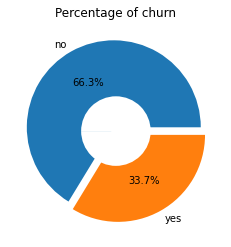

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('Percentage of churn', loc = 'center', fontsize = 12)

In [ ]:
pd.crosstab(index=df["churn"],     # Make a crosstab
                      columns="count")

col_0,count
churn,
no,698
yes,355


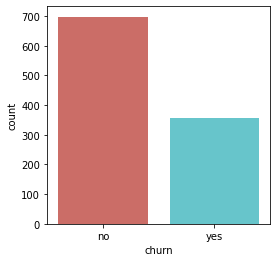

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "churn", data = df, palette = 'hls')
plt.show()

 **point:** According to the distribution of people in two groups, we found that the data is imbalanced.

### 2.Insurer

In [ ]:
df['Insurer'].describe()

count       1053
unique         2
top       person
freq         779
Name: Insurer, dtype: object

In [ ]:
 df['Insurer'].unique()

array(['person', 'company'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby('Insurer').mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
Insurer,,,,,,,,
company,292.386861,4.794672e+09,3.049453e+07,9.933577e+07,4.890511,241970.985401,1.401448e+07,1.159489
person,309.680359,3.895558e+09,2.639795e+07,6.174840e+07,5.044929,255359.576380,4.873091e+06,0.691913


In [ ]:
freq = df["Insurer"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

person     73.979107
company    26.020893
Name: Insurer, dtype: float64


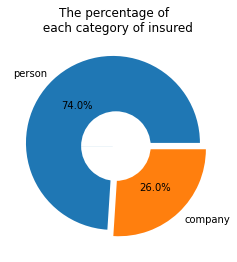

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('The percentage of \n each category of insured', loc = 'center', fontsize = 12)
plt.show()

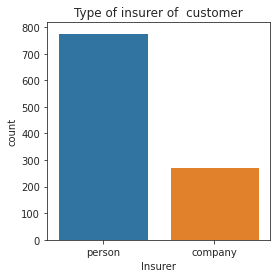

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "Insurer", data = df)
plt.title("Type of insurer of  customer")
plt.show()

In [ ]:
a = pd.crosstab(df['Insurer'],[df['churn']])
a

churn,no,yes
Insurer,,
company,188,86
person,510,269


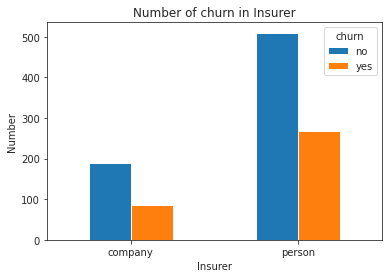

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Number of churn in Insurer')
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
person_frq = df.loc[df['Insurer'] == 'person']["churn"].value_counts()
person_perc = person_frq / person_frq.sum() * 100
company_frq = df.loc[df['Insurer'] == 'company']["churn"].value_counts()
company_perc = company_frq / company_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [person_perc["no"],company_perc["no"]],
                            "yes" : [person_perc["yes"],company_perc["yes"]]})
state_data.index = ["person","company"]
state_data

,no,yes
person,65.468549,34.531451
company,68.613139,31.386861


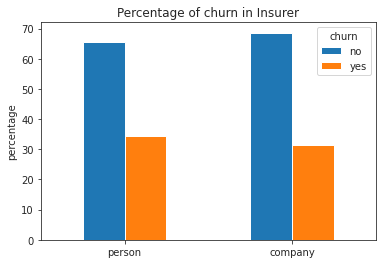

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Percentage of churn in Insurer')
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note:** It seems that Insurer has no effect on customer churn.

### 3.With Name?

In [ ]:
df['with name?'].describe()

count     1053
unique       2
top         no
freq       915
Name: with name?, dtype: object

In [ ]:
 df['with name?'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby('with name?').mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
with name?,,,,,,,,
no,303.251366,4.049989e+09,2.749672e+07,6.951366e+07,5.060109,255054.765027,6.889307e+06,0.754863
yes,317.971014,4.656812e+09,2.724638e+07,8.489130e+07,4.637681,230797.463768,9.654990e+06,1.202899


In [ ]:
freq = df['with name?'].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     86.894587
yes    13.105413
Name: with name?, dtype: float64


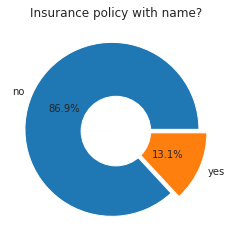

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('Insurance policy with name?', loc = 'center', fontsize = 12)
plt.show()

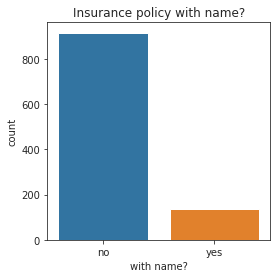

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "with name?", data = df)
plt.title("Insurance policy with name?")
plt.show()

In [ ]:
a = pd.crosstab(df['with name?'],[df['churn']])
a

churn,no,yes
with name?,,
no,610,305
yes,88,50


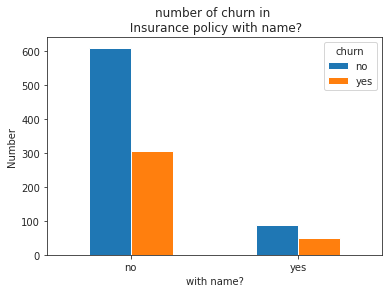

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('number of churn in \n Insurance policy with name?')
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
noname_frq = df.loc[df['with name?'] == 'no']["churn"].value_counts()
noname_perc = noname_frq / noname_frq.sum() * 100
withname_frq = df.loc[df['with name?'] == 'yes']["churn"].value_counts()
withname_perc = withname_frq / withname_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [noname_perc["no"],withname_perc["no"]],
                            "yes" : [noname_perc["yes"],withname_perc["yes"]]})
state_data.index = ["without name","with name"]
state_data

,no,yes
without name,66.666667,33.333333
with name,63.768116,36.231884


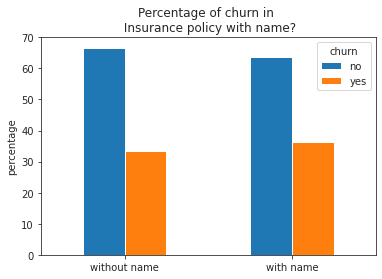

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Percentage of churn in \n Insurance policy with name?')
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note:** It seems that Insurance policy with name? has no effect on customer churn.

### 4.State

In [ ]:
df["state"].describe()

count        1053
unique         31
top       Isfahan
freq          215
Name: state, dtype: object

In [ ]:
 df["state"].unique()

array(['Hormozgan', 'Ilam', 'South Khorasan', 'Razavi Khorasan', 'Zanjan',
       'Mazandaran', 'Isfahan', 'Tehran', 'Markazi', 'Fars', 'Qom',
       'Qazvin', 'Khuzestan', 'Semnan', 'Ardabil', 'Kerman',
       'Chaharmahal and Bakhtiari', 'West Azerbaijan', 'Kordestan',
       'Lorestan', 'Sistan and Baluchestan', 'East Azarbaijan', 'Yazd',
       'Kermanshah', 'Gilan', 'Hamedan', 'Alborz', 'Golestan',
       'Kohgiluyeh and Boyer-Ahmad', 'North Khorasan', 'Bushehr'],
      dtype=object)

In [ ]:
df.iloc[:,1:].groupby("state").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
state,,,,,,,,
Alborz,289.000000,3.330000e+09,3.250000e+07,5.500000e+07,7.500000,406250.000000,5.384819e+06,0.000000
Ardabil,315.210526,4.395789e+09,2.263158e+07,6.526316e+07,5.000000,250000.000000,6.353782e+06,0.000000
Bushehr,352.250000,1.196000e+10,1.875000e+07,1.158333e+08,6.458333,250000.000000,9.135609e+06,0.000000
Chaharmahal and Bakhtiari,327.125000,2.850000e+09,1.875000e+07,4.000000e+07,0.625000,31250.000000,7.315816e+06,0.000000
East Azarbaijan,330.590909,2.956364e+09,2.136364e+07,3.954545e+07,6.363636,204545.454545,9.213320e+06,0.000000
Fars,320.540541,3.193514e+09,3.608108e+07,7.743243e+07,5.000000,250000.000000,8.864020e+06,0.000000
Gilan,157.083333,2.640000e+09,2.083333e+07,4.666667e+07,6.250000,312500.000000,2.742989e+06,0.000000
Golestan,365.000000,6.240000e+09,1.333333e+07,4.333333e+07,5.000000,266666.666667,6.848314e+06,0.000000
Hamedan,302.000000,5.074286e+09,2.928571e+07,8.428571e+07,2.142857,117857.142857,4.360926e+06,2.142857


In [ ]:
freq = df["state"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

Isfahan                       20.417854
Tehran                         9.591643
Khuzestan                      7.217474
Semnan                         6.267806
Hormozgan                      6.172840
Razavi Khorasan                5.887939
Qom                            5.887939
Mazandaran                     4.178538
Fars                           3.513770
Kerman                         3.133903
Bushehr                        2.279202
Qazvin                         2.089269
East Azarbaijan                2.089269
Markazi                        2.089269
Kermanshah                     1.994302
Lorestan                       1.899335
Ardabil                        1.804368
Kordestan                      1.804368
Zanjan                         1.329535
Hamedan                        1.329535
Gilan                          1.139601
Sistan and Baluchestan         1.139601
South Khorasan                 1.044634
North Khorasan                 0.949668
Kohgiluyeh and Boyer-Ahmad     0.854701


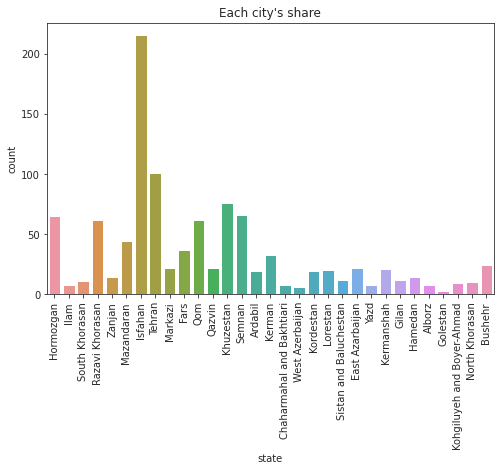

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = "state", data = df)
plt.title("Each city's share")
plt.xticks(rotation = 90)
plt.show()

### 5.Coverage

In [ ]:
df["coverage"].describe()

count         1053
unique           4
top       annually
freq           808
Name: coverage, dtype: object

In [ ]:
 df["coverage"].unique()

array(['annually', 'daily', 'short term', 'long term'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby("coverage").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
coverage,,,,,,,,
annually,365.000000,4.284158e+09,2.726176e+07,7.319678e+07,4.981436,250773.712871,8.169825e+06,0.795421
daily,96.464286,3.806143e+09,2.989286e+07,7.482143e+07,5.071429,252500.000000,4.545557e+06,0.742857
long term,381.000000,6.280000e+09,5.000000e+07,1.100000e+08,5.000000,250000.000000,4.540806e+06,0.000000
short term,118.135922,3.314175e+09,2.531068e+07,5.322330e+07,5.097087,259708.737864,3.780833e+06,1.067961


In [ ]:
freq = df["coverage"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

annually      76.733143
daily         13.295347
short term     9.781576
long term      0.189934
Name: coverage, dtype: float64


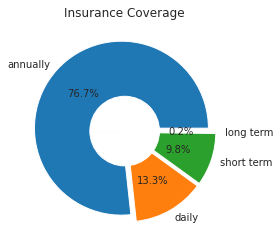

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white','white', 'white'])
plt.title('Insurance Coverage', loc = 'center', fontsize = 12)
plt.show()

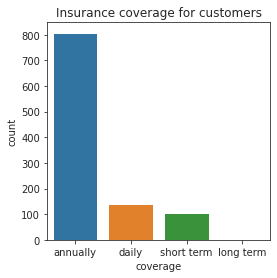

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "coverage", data = df)
plt.title("Insurance coverage for customers")
plt.show()

In [ ]:
a = pd.crosstab(df["coverage"],[df['churn']])
a

churn,no,yes
coverage,,
annually,502,306
daily,108,32
long term,1,1
short term,87,16


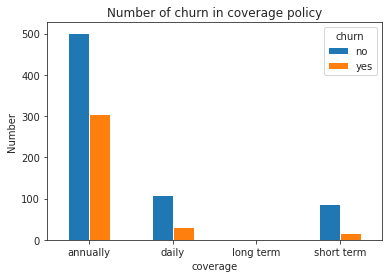

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Number of churn in coverage policy')
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
daily_frq = df.loc[df['coverage'] == 'daily']["churn"].value_counts()
daily_perc =daily_frq / daily_frq.sum() * 100
annually_frq = df.loc[df['coverage'] == 'annually']["churn"].value_counts()
annually_perc = annually_frq / annually_frq.sum() * 100
shortterm_frq = df.loc[df['coverage'] == 'short term']["churn"].value_counts()
shortterm_perc = shortterm_frq / shortterm_frq.sum() * 100
longterm_frq = df.loc[df['coverage'] == 'long term']["churn"].value_counts()
longterm_perc = longterm_frq / longterm_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [daily_perc["no"],annually_perc["no"],shortterm_perc["no"],longterm_perc["no"]],
                            "yes" : [daily_perc["yes"],annually_perc["yes"],shortterm_perc["yes"],longterm_perc["yes"]]})
state_data.index = ["daily ","annually","short term","long term"]
state_data

,no,yes
daily,77.142857,22.857143
annually,62.128713,37.871287
short term,84.466019,15.533981
long term,50.000000,50.000000


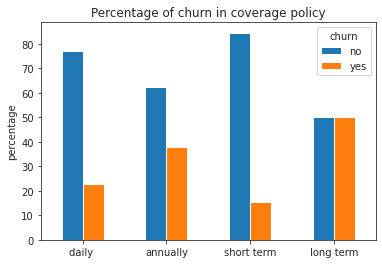

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Percentage of churn in coverage policy')
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note**:  The lowest churn is in short-term insurance policies.

### 6.Previous period?

In [ ]:
df["previous period"].describe()

count     1053
unique       2
top         no
freq       642
Name: previous period, dtype: object

In [ ]:
 df["previous period"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby("previous period").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
previous period,,,,,,,,
no,285.772586,3.909533e+09,2.819315e+07,6.919003e+07,5.101246,255451.713396,6.297600e+06,0.467290
yes,335.496350,4.473139e+09,2.632482e+07,7.518248e+07,4.854015,246289.927007,8.742203e+06,1.354501


In [ ]:
freq = df["previous period"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     60.968661
yes    39.031339
Name: previous period, dtype: float64


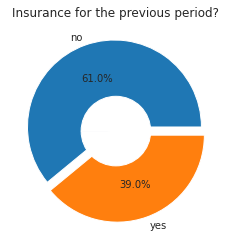

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('Insurance for the previous period?', loc = 'center', fontsize = 12)
plt.show()

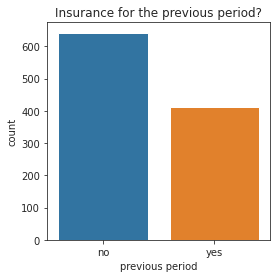

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "previous period", data = df)
plt.title('Insurance for the previous period?')
plt.show()

In [ ]:
a = pd.crosstab(df["previous period"],[df['churn']])
a

churn,no,yes
previous period,,
no,640,2
yes,58,353


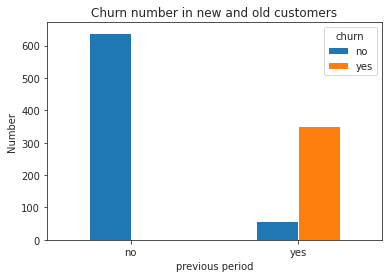

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn number in new and old customers")
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
new_frq = df.loc[df["previous period"] == 'no']["churn"].value_counts()
new_perc = new_frq / new_frq.sum() * 100
old_frq = df.loc[df["previous period"] == 'yes']["churn"].value_counts()
old_perc = old_frq / old_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [new_perc["no"],old_perc["no"]],
                            "yes" : [new_perc["yes"],old_perc["yes"]]})
state_data.index = ["new_customer","old_customer"]
state_data

,no,yes
new_customer,99.688474,0.311526
old_customer,14.111922,85.888078


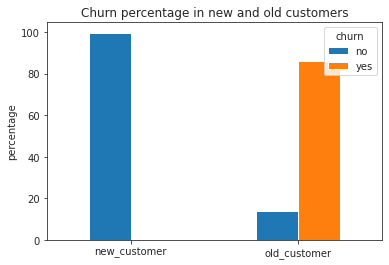

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn percentage in new and old customers")
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note:** It is interesting that customer churn has occurred mostly in old customers.

### 7.History of damage?

In [ ]:
df["History of damage?"].describe()

count     1053
unique       2
top         no
freq      1042
Name: History of damage?, dtype: object

In [ ]:
 df["History of damage?"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby("History of damage?").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
History of damage?,,,,,,,,
no,304.870441,4.127582e+09,2.733157e+07,7.072937e+07,5.014395,252375.393474,6.926990e+06,0.740595
yes,334.545455,4.312727e+09,4.000000e+07,1.472727e+08,4.090909,204545.454545,3.801646e+07,7.727273


In [ ]:
freq = df["History of damage?"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     98.955366
yes     1.044634
Name: History of damage?, dtype: float64


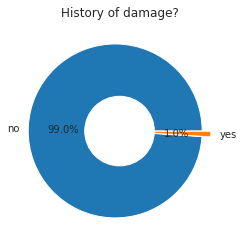

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('History of damage?', loc = 'center', fontsize = 12)
plt.show()

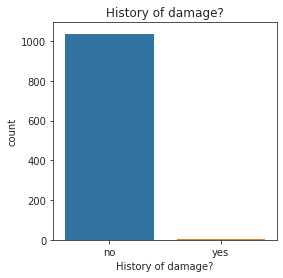

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "History of damage?", data = df)
plt.title("History of damage?")
plt.show()

In [ ]:
a= pd.crosstab(df["History of damage?"],[df['churn']])
a

churn,no,yes
History of damage?,,
no,697,345
yes,1,10


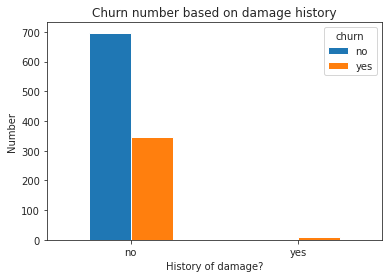

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn number based on damage history")
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
nodamage_frq = df.loc[df["History of damage?"] == 'no']["churn"].value_counts()
nodamage_perc = nodamage_frq / nodamage_frq.sum() * 100
damage_frq = df.loc[df["History of damage?"] == 'yes']["churn"].value_counts()
damage_perc = damage_frq / damage_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [nodamage_perc["no"],damage_perc["no"]],
                            "yes" : [nodamage_perc["yes"],damage_perc["yes"]]})
state_data.index = ["no_damage","damage"]
state_data

,no,yes
no_damage,66.890595,33.109405
damage,9.090909,90.909091


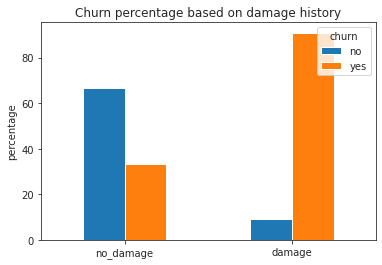

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn percentage based on damage history")
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note:** The churn of customers is high among those who had a history of damage.

### 8.Bachelor's calculation?

In [ ]:
df["Bachelor's calculation?"].describe()

count     1053
unique       2
top         no
freq       989
Name: Bachelor's calculation?, dtype: object

In [ ]:
 df["Bachelor's calculation?"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.iloc[:,1:].groupby("Bachelor's calculation?").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
Bachelor's calculation?,,,,,,,,
no,303.057634,4.086613e+09,2.726542e+07,7.058544e+07,5.045501,255005.141557,6.920192e+06,0.85814
yes,337.984375,4.792500e+09,3.053125e+07,8.610938e+07,4.375000,203516.796875,1.237554e+07,0.12500


In [ ]:
freq = df["Bachelor's calculation?"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     93.922127
yes     6.077873
Name: Bachelor's calculation?, dtype: float64


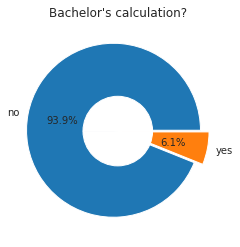

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title("Bachelor's calculation?", loc = 'center', fontsize = 12)
plt.show()

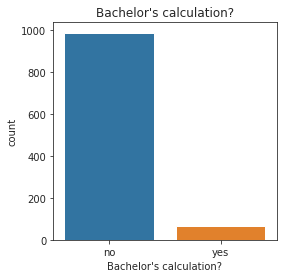

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "Bachelor's calculation?", data = df)
plt.title("Bachelor's calculation?")
plt.show()

In [ ]:
a = pd.crosstab(df["Bachelor's calculation?"],[df['churn']])
a

churn,no,yes
Bachelor's calculation?,,
no,652,337
yes,46,18


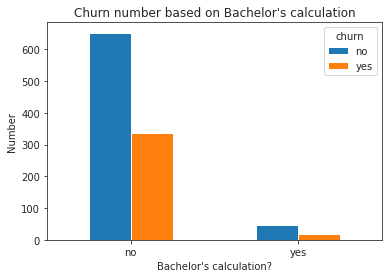

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn number based on Bachelor's calculation")
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
عnocalculate_frq = df.loc[df["Bachelor's calculation?"] == 'no']["churn"].value_counts()
nocalculate_perc = nocalculate_frq / nocalculate_frq.sum() * 100
calculate_frq = df.loc[df["Bachelor's calculation?"] == 'yes']["churn"].value_counts()
calculate_perc = calculate_frq / calculate_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [nocalculate_perc["no"],calculate_perc["no"]],
                            "yes" : [nocalculate_perc["yes"],calculate_perc["yes"]]})
state_data.index = ["no_calculate","calculate"]
state_data

,no,yes
no_calculate,65.925177,34.074823
calculate,71.875000,28.125000


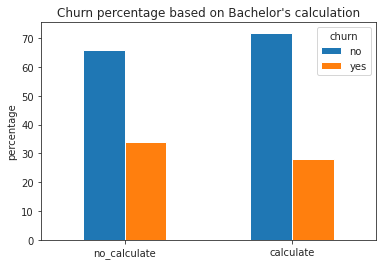

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title("Churn percentage based on Bachelor's calculation")
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

**Note:** It seems that Bachelor's calculation? has no effect on customer churn.

### 9.Duration

In [ ]:
df['duration'].describe()

count    1053.000000
mean      305.180437
std       118.586758
min         2.000000
25%       365.000000
50%       365.000000
75%       365.000000
max       396.000000
Name: duration, dtype: float64

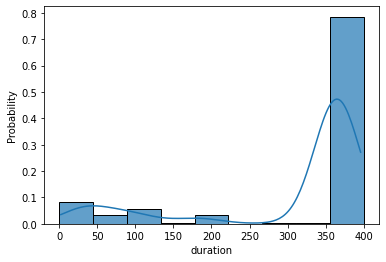

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["duration"], stat = 'probability', kde = True, alpha = 0.7, bins = np.linspace(0,400 ,10))

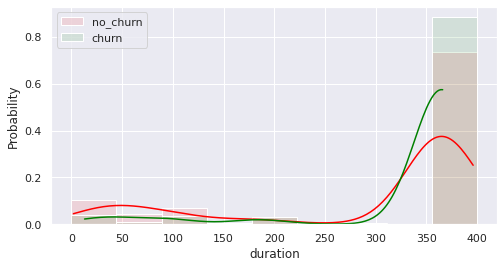

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['churn'] == 'no', 'duration'], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(0,400, 10), color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', 'duration'], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(0,400, 10), color = 'green', label = 'churn')
plt.legend()

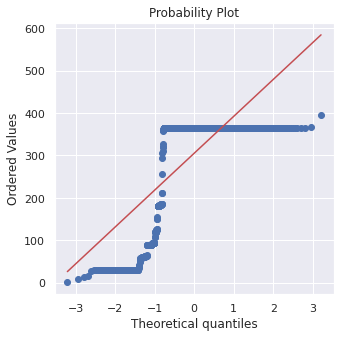

In [ ]:
import pylab
import scipy.stats as stats
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['duration'], dist="norm", plot=pylab)
pylab.show()

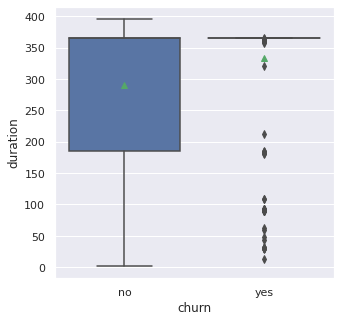

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "duration", data = df, showmeans = True)

***1.The duration is more than 365***

In [ ]:
durup365 = df.loc[df["duration"] > 364]
durup365["duration"].describe()

count    810.000000
mean     365.039506
std        1.089752
min      365.000000
25%      365.000000
50%      365.000000
75%      365.000000
max      396.000000
Name: duration, dtype: float64

In [ ]:
df.loc[df["duration"] > 364].count()

row                         810
Insurer                     810
with name?                  810
state                       810
coverage                    810
duration                    810
Compensation                810
Medical fee per incident    810
Medical fee in period       810
Franchise percentage        810
Minimum franchise           810
previous period             810
History of damage?          810
Bachelor's calculation?     810
Total premium?              810
Risk percentage             810
churn                       810
dtype: int64

In [ ]:
freq = durup365["churn"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     62.098765
yes    37.901235
Name: churn, dtype: float64


***2.The duration is less than 365***

In [ ]:
durdwn365 = df.loc[df["duration"] < 365]
durdwn365["duration"].describe()

count    243.000000
mean     105.650206
std       95.701310
min        2.000000
25%       31.000000
50%       89.000000
75%      139.000000
max      364.000000
Name: duration, dtype: float64

In [ ]:
df.loc[df["duration"] < 365].count()

row                         243
Insurer                     243
with name?                  243
state                       243
coverage                    243
duration                    243
Compensation                243
Medical fee per incident    243
Medical fee in period       243
Franchise percentage        243
Minimum franchise           243
previous period             243
History of damage?          243
Bachelor's calculation?     243
Total premium?              243
Risk percentage             243
churn                       243
dtype: int64

In [ ]:
freq = durdwn365["churn"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

no     80.246914
yes    19.753086
Name: churn, dtype: float64


**Note:** Those whose period is less than 365 days are less likely to churn.

### 10.Compensation

In [ ]:
df["Compensation"].describe()

count    1.053000e+03
mean     4.129516e+09
std      2.945637e+09
min      1.520000e+09
25%      2.000000e+09
50%      3.040000e+09
75%      4.560000e+09
max      3.000000e+10
Name: Compensation, dtype: float64

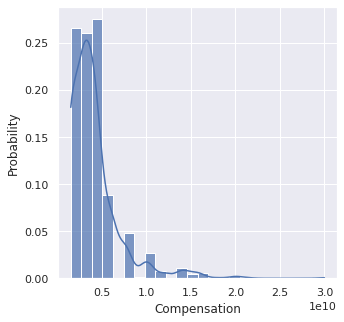

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Compensation"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Compensation"].min(),df["Compensation"].max() ,25))

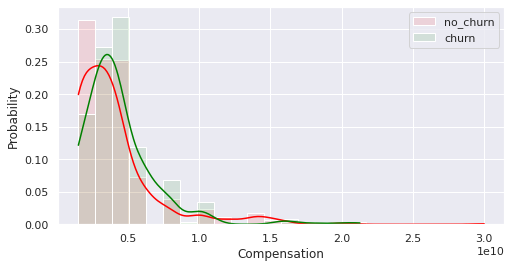

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Compensation"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Compensation"].min(),df["Compensation"].max() ,25),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Compensation"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Compensation"].min(),df["Compensation"].max() ,25),
             color = 'green', label = 'churn')
plt.legend()

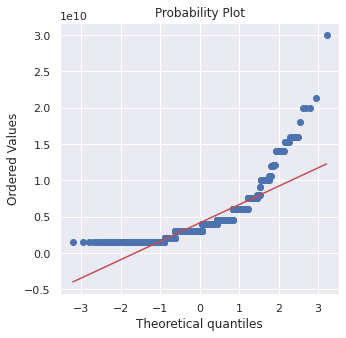

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['Compensation'], dist="norm", plot=pylab)
pylab.show()

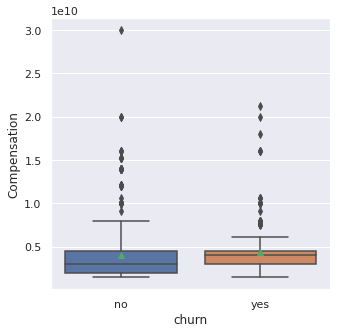

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Compensation", data = df, showmeans = True)

**Note:** There is no obvious difference in the distribution of compensation in the Churn and non-Churn groups.

### 11.Medical fee per incident

In [ ]:
df["Medical fee per incident"].describe()

count    1.053000e+03
mean     2.746391e+07
std      1.939926e+07
min      0.000000e+00
25%      1.000000e+07
50%      2.000000e+07
75%      4.000000e+07
max      1.500000e+08
Name: Medical fee per incident, dtype: float64

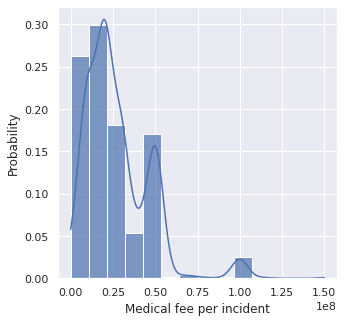

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Medical fee per incident"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Medical fee per incident"].min(),df["Medical fee per incident"].max() ,15))

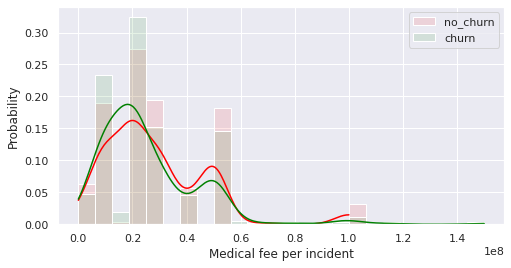

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Medical fee per incident"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Medical fee per incident"].min(),df["Medical fee per incident"].max() ,25),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Medical fee per incident"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Medical fee per incident"].min(),df["Medical fee per incident"].max() ,25),
             color = 'green', label = 'churn')
plt.legend()

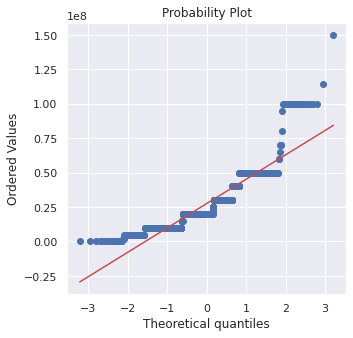

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Medical fee per incident"], dist="norm", plot=pylab)
pylab.show()

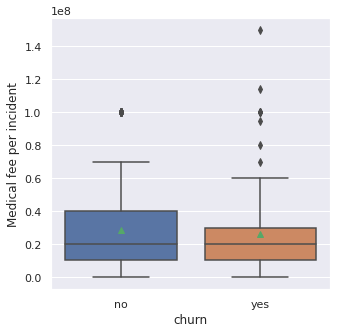

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Medical fee per incident", data = df, showmeans = True)

**Note:** There is no obvious difference in the distribution of Medical fee per incident in the Churn and non-Churn groups.

### 12.Medical fee per period

In [ ]:
 df["Medical fee in period"].describe()

count    1.053000e+03
mean     7.152896e+07
std      8.353713e+07
min      0.000000e+00
25%      2.000000e+07
50%      5.000000e+07
75%      9.000000e+07
max      1.000000e+09
Name: Medical fee in period, dtype: float64

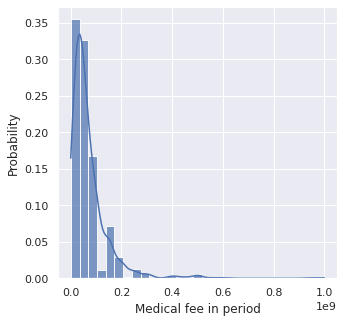

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Medical fee in period"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Medical fee in period"].min(),df["Medical fee in period"].max() ,30))

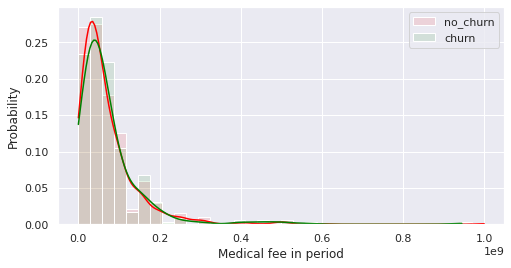

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Medical fee in period"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Medical fee in period"].min(),df["Medical fee in period"].max() ,35),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Medical fee in period"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Medical fee in period"].min(),df["Medical fee in period"].max() ,35),
             color = 'green', label = 'churn')
plt.legend()

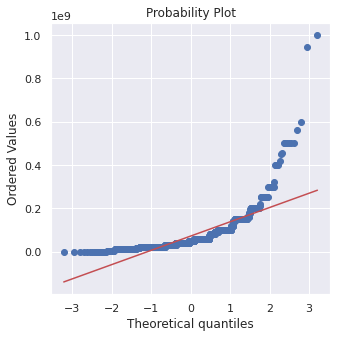

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Medical fee in period"], dist="norm", plot=pylab)
pylab.show()

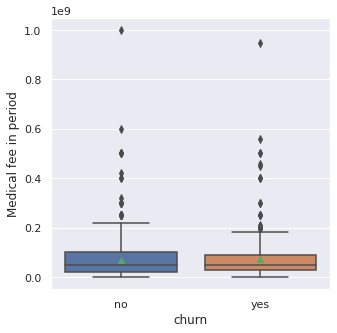

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Medical fee in period", data = df, showmeans = True)

**Note:** There is no obvious difference in the distribution of Medical fee in period in the Churn and non-Churn groups.

### 13.Franchise percentage


In [ ]:
 df["Franchise percentage"].describe()

count    1053.000000
mean        5.004748
std         2.727305
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        50.000000
Name: Franchise percentage, dtype: float64

In [ ]:
 df["Franchise percentage"].unique()

array([ 5,  0, 10, 25, 20, 50])

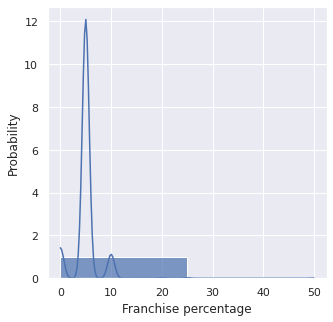

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Franchise percentage"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Franchise percentage"].min(),df["Franchise percentage"].max() ,3))

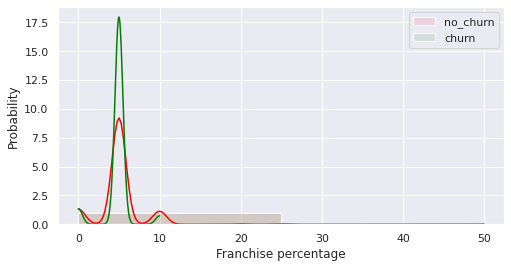

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Franchise percentage"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Franchise percentage"].min(),df["Franchise percentage"].max() ,3),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Franchise percentage"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Franchise percentage"].min(),df["Franchise percentage"].max() ,3),
             color = 'green', label = 'churn')
plt.legend()

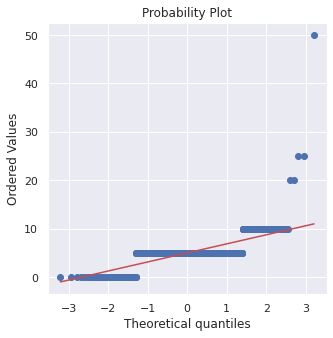

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Franchise percentage"], dist="norm", plot=pylab)
pylab.show()

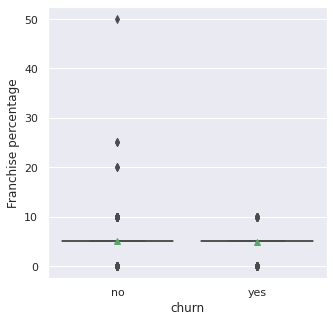

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Franchise percentage", data = df, showmeans = True)

**Note:** This attribute should be converted to categorical.

In [ ]:
df['Franchise percentage'] = df['Franchise percentage'].astype("object")

In [ ]:
df['Franchise percentage'].describe()

count     1053
unique       6
top          5
freq       866
Name: Franchise percentage, dtype: int64

In [ ]:
df.iloc[:,1:].groupby("Franchise percentage").mean()

,duration,Compensation,Medical fee per incident,Medical fee in period,Minimum franchise,Total premium?,Risk percentage
Franchise percentage,,,,,,,
0,311.421569,4.714510e+09,2.930392e+07,8.858824e+07,9803.921569,9.255096e+06,0.735294
5,304.077367,3.998684e+09,2.744861e+07,6.879215e+07,260883.545035,6.755613e+06,0.879561
10,313.037500,4.920000e+09,2.550000e+07,8.150000e+07,438125.125000,1.032270e+07,0.250000
20,60.500000,1.760000e+09,1.500000e+07,1.500000e+07,750000.000000,1.070000e+06,0.000000
25,365.000000,2.760000e+09,2.000000e+07,3.000000e+07,750000.000000,5.751561e+06,0.000000
50,365.000000,2.000000e+09,5.000000e+07,1.000000e+08,250000.000000,2.264760e+06,0.000000


In [ ]:
freq = df["Franchise percentage"].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

5     82.241216
0      9.686610
10     7.597341
25     0.189934
20     0.189934
50     0.094967
Name: Franchise percentage, dtype: float64


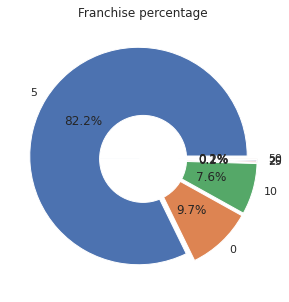

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05,0.05,0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white','white', 'white','white', 'white'])
plt.title('Franchise percentage', loc = 'center', fontsize = 12)
plt.show()

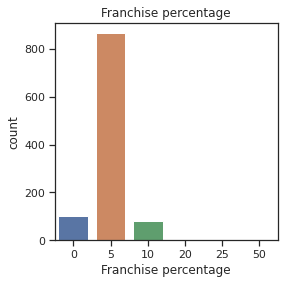

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "Franchise percentage", data = df)
plt.title("Franchise percentage")
plt.show()

In [ ]:
 a = pd.crosstab(df["Franchise percentage"],[df['churn']])
 a

churn,no,yes
Franchise percentage,,
0,78,24
5,548,318
10,67,13
20,2,0
25,2,0
50,1,0


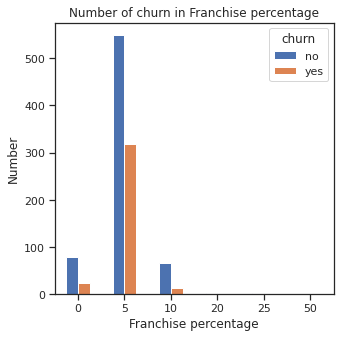

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Number of churn in Franchise percentage')
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
perc0_frq = df.loc[df["Franchise percentage"] == 0]["churn"].value_counts()
perc0_perc =perc0_frq / perc0_frq.sum() * 100
perc5_frq = df.loc[df["Franchise percentage"] == 5]["churn"].value_counts()
perc5_perc = perc5_frq / perc5_frq.sum() * 100
perc10_frq = df.loc[df["Franchise percentage"] == 10]["churn"].value_counts()
perc10_perc = perc10_frq / perc10_frq.sum() * 100
perc20_frq = df.loc[df["Franchise percentage"] == 20]["churn"].value_counts()
perc20_perc = perc20_frq / perc20_frq.sum() * 100
perc25_frq = df.loc[df["Franchise percentage"] == 25]["churn"].value_counts()
perc25_perc = perc25_frq / perc25_frq.sum() * 100
perc50_frq = df.loc[df["Franchise percentage"] == 50]["churn"].value_counts()
perc50_perc = perc50_frq / perc50_frq.sum() * 100

In [ ]:
state_data = pd.DataFrame({ "no"  : [perc0_perc[0],perc5_perc[0],perc10_perc[0],
                                     perc20_perc[0],perc25_perc[0],perc50_perc[0]],
                            "yes" : [perc0_perc[1],perc5_perc[1],perc10_perc[1],
                                     0,0,0]})
state_data.index = ["0 ","5","10","20","25","50"]
state_data

,no,yes
0,76.470588,23.529412
5,63.279446,36.720554
10,83.750000,16.250000
20,100.000000,0.000000
25,100.000000,0.000000
50,100.000000,0.000000


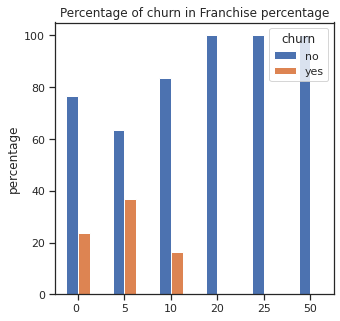

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'churn', loc ='upper right')
plt.title('Percentage of churn in Franchise percentage')
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

### 14.Minimum franchise

In [ ]:
 df["Minimum franchise"].describe()

count    1.053000e+03
mean     2.518757e+05
std      1.609792e+05
min      0.000000e+00
25%      2.500000e+05
50%      2.500000e+05
75%      2.500000e+05
max      3.000000e+06
Name: Minimum franchise, dtype: float64

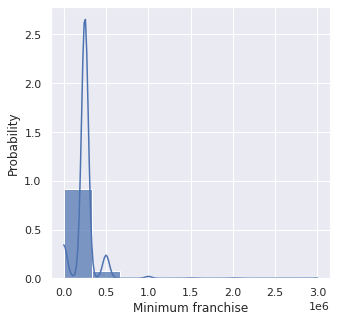

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Minimum franchise"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Minimum franchise"].min(),df["Minimum franchise"].max() ,10))

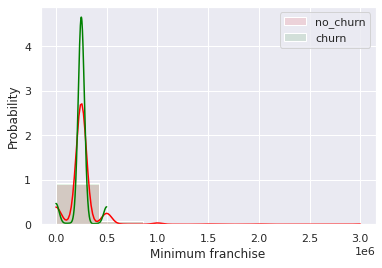

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Minimum franchise"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Minimum franchise"].min(),df["Minimum franchise"].max() ,8),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Minimum franchise"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Minimum franchise"].min(),df["Minimum franchise"].max() ,8),
             color = 'green', label = 'churn')
plt.legend()

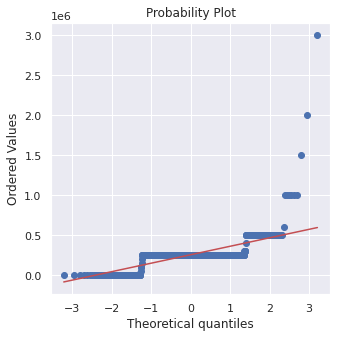

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Minimum franchise"], dist="norm", plot=pylab)
pylab.show()

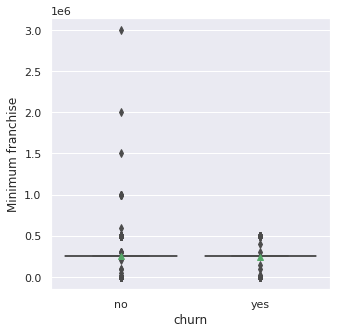

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Minimum franchise", data = df, showmeans = True)

### 15.Total premium?

In [ ]:
 df["Total premium?"].describe()

count    1.053000e+03
mean     7.251761e+06
std      1.241530e+07
min      7.125000e+05
25%      2.162294e+06
50%      3.833676e+06
75%      7.076160e+06
max      1.550000e+08
Name: Total premium?, dtype: float64

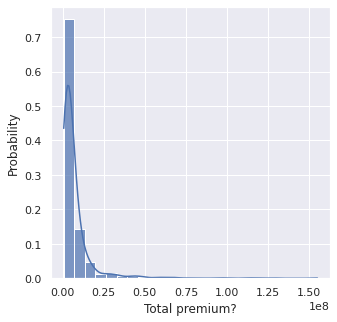

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Total premium?"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Total premium?"].min(),df["Total premium?"].max() ,25))

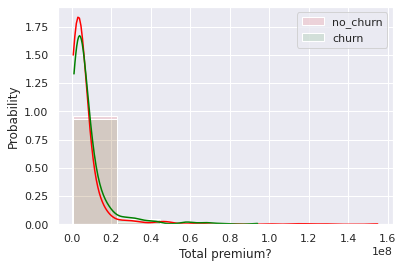

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Total premium?"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Total premium?"].min(),df["Total premium?"].max() ,8),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Total premium?"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Total premium?"].min(),df["Total premium?"].max() ,8),
             color = 'green', label = 'churn')
plt.legend()

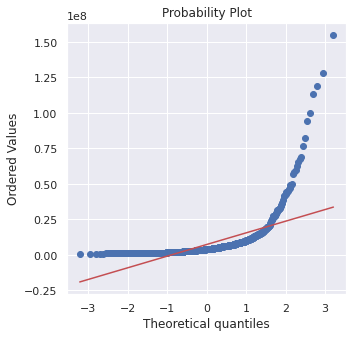

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Total premium?"], dist="norm", plot=pylab)
pylab.show()

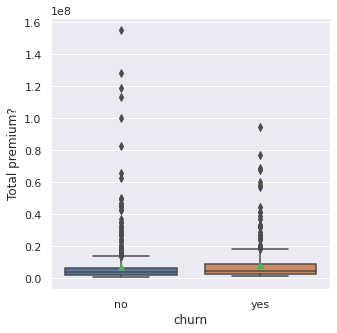

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Total premium?", data = df, showmeans = True)

**Note:** There is no obvious difference in the distribution of Total premium? in the Churn and non-Churn groups.

### 16.Risk percentage

In [ ]:
 df["Risk percentage"].describe()

count    1053.000000
mean        0.813580
std         5.289373
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        71.000000
Name: Risk percentage, dtype: float64

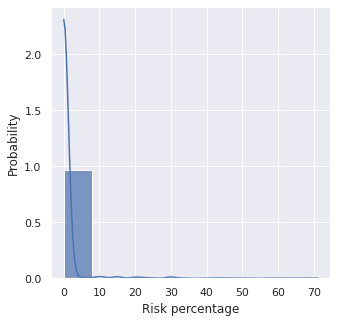

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Risk percentage"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Risk percentage"].min(),df["Risk percentage"].max() ,10))

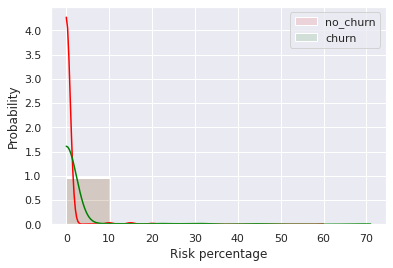

In [ ]:
#Density Function for Two Groups
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(df.loc[df['churn'] == 'no', "Risk percentage"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Risk percentage"].min(),df["Risk percentage"].max() ,8),
             color = 'red', label = 'no_churn')
sns.histplot(df.loc[df['churn'] == 'yes', "Risk percentage"], stat = 'probability', kde = True,
             alpha = 0.1, bins = np.linspace(df["Risk percentage"].min(),df["Risk percentage"].max() ,8),
             color = 'green', label = 'churn')
plt.legend()

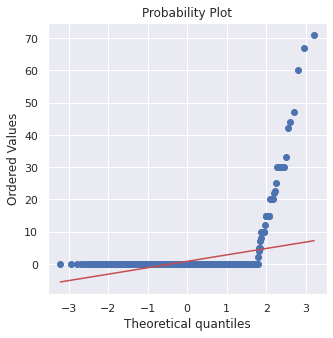

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Risk percentage"], dist="norm", plot=pylab)
pylab.show()

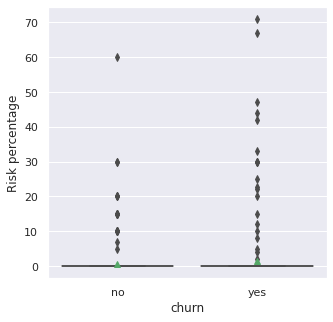

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'churn', y = "Risk percentage", data = df, showmeans = True)

### general

In [ ]:
df_num = df.loc[:,('duration','Compensation','Medical fee per incident',
                   'Medical fee in period',"Franchise percentage",'Minimum franchise','Total premium?',
                   'Risk percentage',)]
df_num.head()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
0,365,3040000000,20000000,40000000,5,250000,2337406,0.0
1,365,4560000000,20000000,60000000,0,0,1728012,0.0
2,60,4560000000,10000000,30000000,5,250000,1152220,0.0
3,365,4560000000,10000000,30000000,5,250000,2330516,0.0
4,365,4560000000,10000000,30000000,5,250000,6988686,20.0


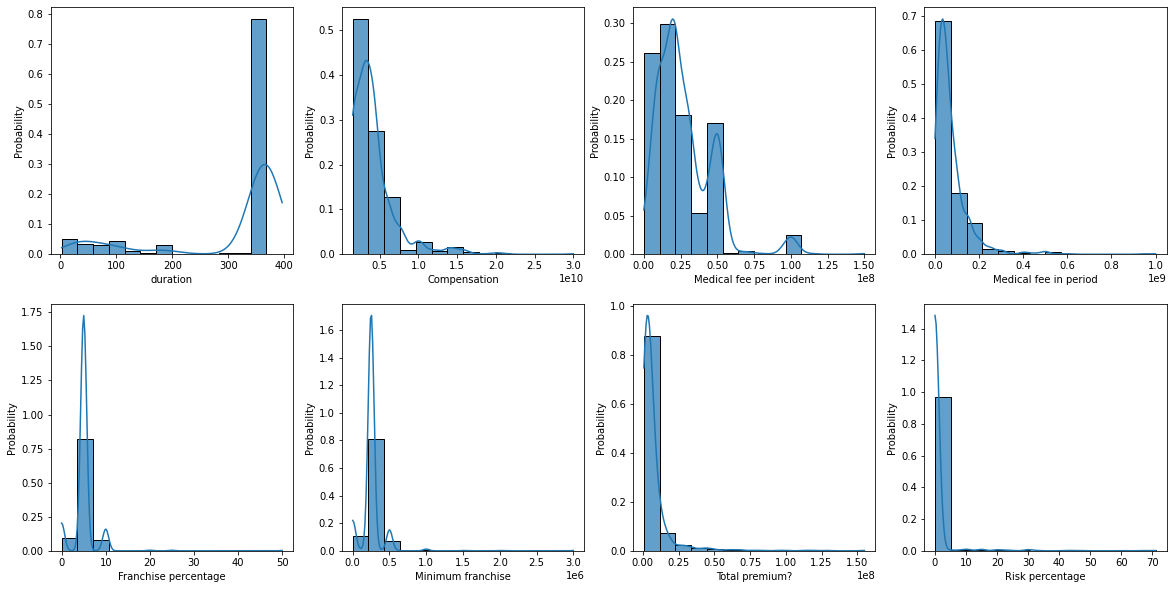

In [ ]:
fig, ax = plt.subplots(2,4 )
fig.set_size_inches(20, 10)
sns.histplot(data=df_num, stat = 'probability',x='duration', ax=ax[0,0],kde = True,alpha = 0.7,
             bins = np.linspace(df_num['duration'].min(),df_num['duration'].max(), 15))
sns.histplot(data=df_num, stat = 'probability' ,x='Compensation', ax=ax[0,1],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Compensation'].min(),df_num['Compensation'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Medical fee per incident', ax=ax[0,2],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Medical fee per incident'].min(),df_num['Medical fee per incident'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Medical fee in period', ax=ax[0,3],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Medical fee in period'].min(),df_num['Medical fee in period'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Franchise percentage', ax=ax[1,0],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Franchise percentage'].min(),df_num['Franchise percentage'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Minimum franchise', ax=ax[1,1],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Minimum franchise'].min(),df_num['Minimum franchise'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Total premium?', ax=ax[1,2],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Total premium?'].min(),df_num['Total premium?'].max(), 15))
sns.histplot(data=df_num, stat = 'probability',x='Risk percentage', ax=ax[1,3],kde = True,alpha = 0.7,
            bins = np.linspace(df_num['Risk percentage'].min(),df_num['Risk percentage'].max(), 15))

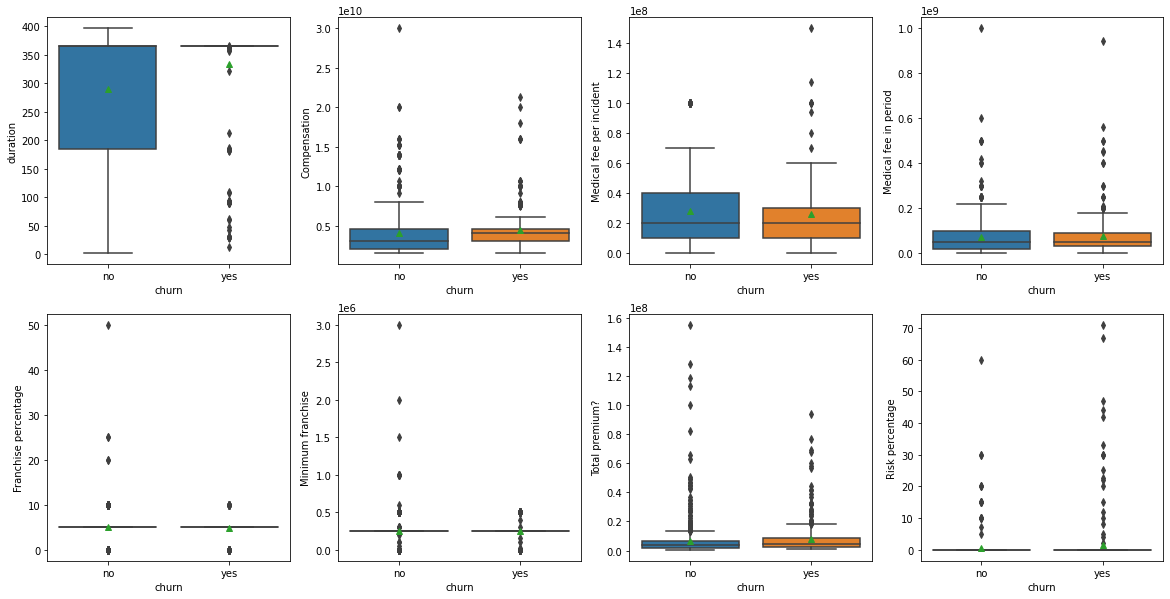

In [ ]:
fig, ax = plt.subplots(2,4 , figsize=(20,10))
sns.boxplot(x = 'churn', y = 'duration', data = df, showmeans = True, ax=ax[0,0])
sns.boxplot(x = 'churn', y = 'Compensation', data = df, showmeans = True, ax=ax[0,1])
sns.boxplot(x = 'churn', y = 'Medical fee per incident', data = df, showmeans = True, ax=ax[0,2])
sns.boxplot(x = 'churn', y = 'Medical fee in period', data = df, showmeans = True, ax=ax[0,3])
sns.boxplot(x = 'churn', y = 'Franchise percentage', data = df, showmeans = True, ax=ax[1,0])
sns.boxplot(x = 'churn', y = 'Minimum franchise', data = df, showmeans = True, ax=ax[1,1])
sns.boxplot(x = 'churn', y = 'Total premium?', data = df, showmeans = True, ax=ax[1,2])
sns.boxplot(x = 'churn', y = 'Risk percentage', data = df, showmeans = True, ax=ax[1,3])

In [ ]:
corr = df.iloc[:,1:].corr()
corr

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage
duration,1.000000,0.129710,-0.018053,0.058825,-0.006748,-0.008472,0.166290,0.004641
Compensation,0.129710,1.000000,-0.008711,0.502835,-0.024120,-0.074968,0.404232,-0.012536
Medical fee per incident,-0.018053,-0.008711,1.000000,0.651710,-0.024836,-0.004716,0.124255,-0.033640
Medical fee in period,0.058825,0.502835,0.651710,1.000000,-0.028320,-0.038154,0.465901,-0.021607
Franchise percentage,-0.006748,-0.024120,-0.024836,-0.028320,1.000000,0.503910,-0.007389,-0.018389
Minimum franchise,-0.008472,-0.074968,-0.004716,-0.038154,0.503910,1.000000,-0.006778,-0.012120
Total premium?,0.166290,0.404232,0.124255,0.465901,-0.007389,-0.006778,1.000000,0.033230
Risk percentage,0.004641,-0.012536,-0.033640,-0.021607,-0.018389,-0.012120,0.033230,1.000000


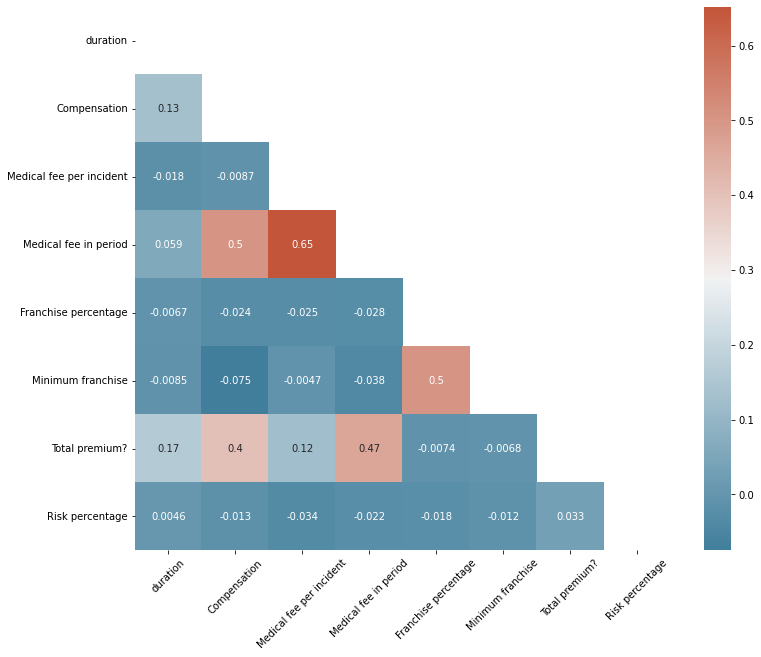

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.tick_params(axis='x', rotation=45)
fig.savefig('relation_mat.png')

# Data Preprocessing

### Remove extra columns

In [ ]:
df = df.drop(["row"], axis = 1)
df.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


### Dealing with Outlayers

**NOTE:** Because outliers data is important, we use the multivariate detection model.

#### Mahalanobis D2

In [ ]:
import scipy as stats
# calculateMahalanobis function to calculate
# the Mahalanobis distance
def calculateMahalanobis(y=None, data=None, cov=None):

    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [ ]:
df_mahal = df_num

In [ ]:
# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
df_mahal['calculateMahalanobis'] = calculateMahalanobis(y=df_mahal, data=df_mahal)

# Display the dataframe
df_mahal.head(10)

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage,calculateMahalanobis
0,365,3040000000,20000000,40000000,5,250000,2337406,0.0,0.752462
1,365,4560000000,20000000,60000000,0,0,1728012,0.0,4.726547
2,60,4560000000,10000000,30000000,5,250000,1152220,0.0,5.412061
3,365,4560000000,10000000,30000000,5,250000,2330516,0.0,1.315900
4,365,4560000000,10000000,30000000,5,250000,6988686,20.0,14.047280
5,60,3040000000,30000000,60000000,5,300000,1721758,0.0,4.428879
6,365,3040000000,30000000,60000000,5,250000,4164952,0.0,0.529991
7,365,4560000000,20000000,60000000,5,250000,6080266,0.0,0.478751
8,30,3040000000,25000000,50000000,5,250000,3410868,0.0,5.464154
9,365,4560000000,30000000,90000000,5,250000,14772372,0.0,0.596067


In [ ]:
df_mahalup10 = df_mahal.loc[df_mahal['calculateMahalanobis'] > 10]
print(df_mahalup10.shape)

(145, 9)


**NOTE:** With multivariate detection to identify outlier data, we came to the conclusion that we have a lot of outlier data, but since the outlier data is an important part of the information, we do not remove it.

### Dealing with imbalanced data

#### 1.Random over sampling

In [ ]:
df.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
x = df.drop(["churn"], axis=1)
y = df.iloc[:,-1]
y.head()

0     no
1    yes
2     no
3    yes
4     no
Name: churn, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x, y)

In [ ]:
data_ros = pd.DataFrame(y_ros)
data_ros.describe()

,churn
count,1396
unique,2
top,no
freq,698


In [ ]:
from collections import Counter
print(sorted(Counter(y_ros).items()))

[('no', 698), ('yes', 698)]


In [ ]:
df_ros = x_ros
df_ros["Churn"] = y_ros

In [ ]:
df_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insurer                   1396 non-null   object 
 1   with name?                1396 non-null   object 
 2   state                     1396 non-null   object 
 3   coverage                  1396 non-null   object 
 4   duration                  1396 non-null   int64  
 5   Compensation              1396 non-null   int64  
 6   Medical fee per incident  1396 non-null   int64  
 7   Medical fee in period     1396 non-null   int64  
 8   Franchise percentage      1396 non-null   int64  
 9   Minimum franchise         1396 non-null   int64  
 10  previous period           1396 non-null   object 
 11  History of damage?        1396 non-null   object 
 12  Bachelor's calculation?   1396 non-null   object 
 13  Total premium?            1396 non-null   int64  
 14  Risk per

In [ ]:
df_ros.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


#### 2.SMOTE-NC

In [ ]:
from imblearn.over_sampling import SMOTENC
#Obatin column index for categorical features
cat_col_index = list([0,1,2,3,10,11,12])

sm = SMOTENC(categorical_features=cat_col_index, random_state=123)
x_smt, y_smt = sm.fit_resample(x, y)

In [ ]:
print(sorted(Counter(y_smt).items()))

[('no', 698), ('yes', 698)]


In [ ]:
data_ros = pd.DataFrame(y_smt)
data_ros.describe()

,churn
count,1396
unique,2
top,no
freq,698


In [ ]:
df_smt = x_smt
df_smt["Churn"] = y_smt
df_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insurer                   1396 non-null   object 
 1   with name?                1396 non-null   object 
 2   state                     1396 non-null   object 
 3   coverage                  1396 non-null   object 
 4   duration                  1396 non-null   int64  
 5   Compensation              1396 non-null   int64  
 6   Medical fee per incident  1396 non-null   int64  
 7   Medical fee in period     1396 non-null   int64  
 8   Franchise percentage      1396 non-null   int64  
 9   Minimum franchise         1396 non-null   int64  
 10  previous period           1396 non-null   object 
 11  History of damage?        1396 non-null   object 
 12  Bachelor's calculation?   1396 non-null   object 
 13  Total premium?            1396 non-null   int64  
 14  Risk per

# Creating Models

# Deep Learning Algorithm

## 1.Multilayer neural network

### ROS_Data

In [ ]:
df_ros.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
# Separation of independent variables and response variable
data = df_ros
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0


In [ ]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insurer                   1396 non-null   object 
 1   with name?                1396 non-null   object 
 2   state                     1396 non-null   object 
 3   coverage                  1396 non-null   object 
 4   duration                  1396 non-null   int64  
 5   Compensation              1396 non-null   int64  
 6   Medical fee per incident  1396 non-null   int64  
 7   Medical fee in period     1396 non-null   int64  
 8   Franchise percentage      1396 non-null   int64  
 9   Minimum franchise         1396 non-null   int64  
 10  previous period           1396 non-null   object 
 11  History of damage?        1396 non-null   object 
 12  Bachelor's calculation?   1396 non-null   object 
 13  Total premium?            1396 non-null   int64  
 14  Risk per

In [ ]:

# One Hot Encoding for Categorical features(independent variables)
data_x = pd.get_dummies(data = data_x, columns = ['Insurer',
        'with name?','state','coverage','previous period',
        'History of damage?',"Bachelor's calculation?"])
data_x.head()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage,Insurer_company,Insurer_person,...,coverage_annually,coverage_daily,coverage_long term,coverage_short term,previous period_no,previous period_yes,History of damage?_no,History of damage?_yes,Bachelor's calculation?_no,Bachelor's calculation?_yes
0,365,3040000000,20000000,40000000,5,250000,2337406,0.0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,365,4560000000,20000000,60000000,0,0,1728012,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
2,60,4560000000,10000000,30000000,5,250000,1152220,0.0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,365,4560000000,10000000,30000000,5,250000,2330516,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
4,365,4560000000,10000000,30000000,5,250000,6988686,20.0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
# One Hot Encoding for Categorical features(response variable)
data_y = pd.get_dummies(data = data_y, columns = ['churn'])
data_y

,no,yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1391,0,1
1392,0,1
1393,0,1
1394,0,1


In [ ]:
data_y = data_y.drop(["no"], axis = 1)
data_y

,yes
0,0
1,1
2,0
3,1
4,0
...,...
1391,1
1392,1
1393,1
1394,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_y = scaler.fit_transform(data_y)
data_y

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
#Check Frequency of each Category in Train Dataset
np.unique(data_y, return_counts = True)
#Balanced Data


(array([0., 1.]), array([698, 698]))

In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)
data_x

array([[0.9213198 , 0.05337079, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.9213198 , 0.10674157, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.14720812, 0.10674157, 0.06666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.9213198 , 0.05337079, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.9213198 , 0.29775281, 0.06666667, ..., 0.        , 1.        ,
        0.        ],
       [0.9213198 , 0.50842697, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123)

In [ ]:
x_train.shape

(1047, 53)

In [ ]:
x_train[0]

array([0.9213198 , 0.05337079, 0.2       , 0.06      , 0.1       ,
       0.08333333, 0.00449132, 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        ])

In [ ]:
x_test.shape

(349, 53)

In [ ]:
y_train.shape

(1047, 1)

In [ ]:
y_test.shape

(349, 1)

In [ ]:
def model_b_func():
  model = keras.models.Sequential()
  weight_initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 2/53)
  model.add(keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = weight_initializer))
  model.compile(optimizer = 'adam', loss = '', metrics = ['accuracy'])
  return(model)

In [ ]:
def model_2l_func():
  model = keras.models.Sequential()
  weight_initializer_1 = tf.keras.initializers.RandomNormal(mean = 0, stddev = 2/53)
  model.add(keras.layers.Dense(64, input_dim = 53, activation = "relu", kernel_initializer = weight_initializer_1))
  weight_initializer_2 = tf.keras.initializers.RandomNormal(mean = 0, stddev = 2/64)
  model.add(keras.layers.Dense(64, input_dim = 64, activation = "relu", kernel_initializer = weight_initializer_2))
  model.add(keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = weight_initializer_2))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return(model)

In [ ]:
def model_3l_func():
  model = keras.models.Sequential()
  weight_initializer_1 = tf.keras.initializers.RandomNormal(mean = 0, stddev = 2/53)
  model.add(keras.layers.Dense(64, input_dim = 53, activation = "relu", kernel_initializer = weight_initializer_1))
  weight_initializer_2 = tf.keras.initializers.RandomNormal(mean = 0, stddev = 2/64)
  model.add(keras.layers.Dense(64, input_dim = 64, activation = "relu", kernel_initializer = weight_initializer_2))
  model.add(keras.layers.Dense(64, input_dim = 64, activation = "relu", kernel_initializer = weight_initializer_2))
  model.add(keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = weight_initializer_2))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return(model)

In [ ]:
#5-fold Cross Validation
models = [model_b_func, model_2l_func, model_3l_func]
cv_results_1 = []

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

np.random.seed(123)
from tensorflow import random
random.set_seed(123)

#Loop over three models
for m in range(len(models)):
    model = KerasClassifier(build_fn = models[m], epochs = 10, batch_size = 32, verbose = 1)
    kf = KFold(n_splits = 5)
    result = cross_val_score(model, scoring = "accuracy", X = x_train, y = y_train, cv = kf)
    cv_results_1.append(result)

<ipython-input-52-14aa2d78f867>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = models[m], epochs = 10, batch_size = 32, verbose = 1)


Epoch 1/10
27/27 [==============================] - 1s 2ms/step - loss: 0.7032 - accuracy: 0.3501
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5806
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.7025
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7778
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.7849
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.8315
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.8495
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.8853
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.9056
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
27/27 [==============================] - 0s 

<ipython-input-52-14aa2d78f867>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = models[m], epochs = 10, batch_size = 32, verbose = 1)


27/27 [==============================] - 1s 2ms/step - loss: 0.6827 - accuracy: 0.6953
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.9546
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9606
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9606
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9606
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9606
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9606
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9642
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9618
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
27/27 [==============================] - 1s 2ms/step - 

<ipython-input-52-14aa2d78f867>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = models[m], epochs = 10, batch_size = 32, verbose = 1)


27/27 [==============================] - 1s 5ms/step - loss: 0.6858 - accuracy: 0.6750
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.9594
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 0.9606
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9630
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9630
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1221 - accuracy: 0.9606
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9618
Epoch 8/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9642
Epoch 9/10
27/27 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9689
Epoch 10/10
7/7 [==============================] - 0s 4ms/step
Epoch 1/10
27/27 [==============================] - 1s 2ms/step - 

In [ ]:
   cv_results_1

[array([0.92380952, 0.96190476, 0.93779904, 0.88038278, 0.96650718]),
 array([0.95238095, 0.97619048, 0.95215311, 0.95215311, 0.96650718]),
 array([0.95714286, 0.97619048, 0.94736842, 0.95215311, 0.96650718])]

In [ ]:
#Print the Cross-validation Scores
print("CV Mean Accuracy for Base Model = ", format(cv_results_1[0].max(), '0.4f'))
print("CV Mean Accuracy for 2-Layer Model = ", format(cv_results_1[1].max(), '0.4f'))
print("CV Mean Accuracy for 3-Layer Model = ", format(cv_results_1[2].max(), '0.4f'))

CV Mean Accuracy for Base Model =  0.9665
CV Mean Accuracy for 2-Layer Model =  0.9762
CV Mean Accuracy for 3-Layer Model =  0.9762


In [ ]:
#Focus on 3-Layer Model
epochs = [10, 20, 40]
batch_size = [32, 64, 128]
cv_results_2 = []

#Loop over epochs and batch_size
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

np.random.seed(123)
from tensorflow import random
random.set_seed(123)

for b in batch_size:
  for e in epochs:
    model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)
    kf = KFold(n_splits = 5)
    result = cross_val_score(model, scoring = "accuracy", X = x_train, y = y_train, cv = kf)
    cv_results_2.append(result)

Epoch 1/10


<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


27/27 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.7587
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.9606
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9606
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9630
Epoch 5/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9642
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9618
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9618
Epoch 8/10
27/27 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9618
Epoch 9/10
27/27 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9665
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
27/27 [==============================] - 1s 3ms/step - 

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


27/27 [==============================] - 1s 2ms/step - loss: 0.6858 - accuracy: 0.6750
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.9594
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9606
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9630
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9630
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9606
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9618
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9642
Epoch 9/20
27/27 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9689
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9642
Epoch 11/20
27/27 [===========

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


27/27 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.6953
Epoch 2/40
27/27 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.9594
Epoch 3/40
27/27 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9606
Epoch 4/40
27/27 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9630
Epoch 5/40
27/27 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9594
Epoch 6/40
27/27 [==============================] - 0s 3ms/step - loss: 0.1248 - accuracy: 0.9630
Epoch 7/40
27/27 [==============================] - 0s 4ms/step - loss: 0.1159 - accuracy: 0.9642
Epoch 8/40
27/27 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9654
Epoch 9/40
27/27 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9689
Epoch 10/40
27/27 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.9654
Epoch 11/40
27/27 [===========

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


14/14 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5818
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.9211
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.9450
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.9594
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9606
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9606
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9618
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9618
Epoch 9/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9642
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
14/14 [==============================] - 1s 3ms/step - 

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


14/14 [==============================] - 1s 5ms/step - loss: 0.6916 - accuracy: 0.6153
Epoch 2/20
14/14 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.9498
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.9582
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.9606
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9606
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 0.1342 - accuracy: 0.9606
Epoch 7/20
14/14 [==============================] - 0s 5ms/step - loss: 0.1234 - accuracy: 0.9606
Epoch 8/20
14/14 [==============================] - 0s 5ms/step - loss: 0.1177 - accuracy: 0.9642
Epoch 9/20
14/14 [==============================] - 0s 5ms/step - loss: 0.1149 - accuracy: 0.9642
Epoch 10/20
14/14 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9654
Epoch 11/20
14/14 [===========

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


14/14 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5627
Epoch 2/40
14/14 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.9534
Epoch 3/40
14/14 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.9570
Epoch 4/40
14/14 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.9606
Epoch 5/40
14/14 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9606
Epoch 6/40
14/14 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9606
Epoch 7/40
14/14 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9606
Epoch 8/40
14/14 [==============================] - 0s 4ms/step - loss: 0.1172 - accuracy: 0.9630
Epoch 9/40
14/14 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9642
Epoch 10/40
14/14 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9642
Epoch 11/40
14/14 [===========

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


7/7 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.7049
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.9606
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.9606
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.9606
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.9606
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.9606
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.9606
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1948 - accuracy: 0.9606
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9606
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 0.6923 - accur

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


7/7 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5245
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.9462
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.9606
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6612 - accuracy: 0.9606
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.6119 - accuracy: 0.9606
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.5179 - accuracy: 0.9606
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.9606
Epoch 8/20
7/7 [==============================] - 0s 7ms/step - loss: 0.2380 - accuracy: 0.9606
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.9606
Epoch 10/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1305 - accuracy: 0.9618
Epoch 11/20
7/7 [==============================] -

<ipython-input-58-a32645691a78>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = model_3l_func, batch_size = b, epochs = e, verbose = 1)


7/7 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5030
Epoch 2/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.8280
Epoch 3/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.9092
Epoch 4/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.9343
Epoch 5/40
7/7 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.9415
Epoch 6/40
7/7 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.9522
Epoch 7/40
7/7 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.9618
Epoch 8/40
7/7 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.9618
Epoch 9/40
7/7 [==============================] - 0s 4ms/step - loss: 0.1621 - accuracy: 0.9606
Epoch 10/40
7/7 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9630
Epoch 11/40
7/7 [==============================] -

In [ ]:
cv_results_2

[array([0.95714286, 0.97619048, 0.94736842, 0.95215311, 0.97607656]),
 array([0.94285714, 0.96666667, 0.94736842, 0.9569378 , 0.96172249]),
 array([0.95714286, 0.96666667, 0.94736842, 0.97129187, 0.97607656]),
 array([0.95238095, 0.97619048, 0.94736842, 0.95215311, 0.96650718]),
 array([0.95238095, 0.97619048, 0.94736842, 0.95215311, 0.96650718]),
 array([0.94761905, 0.97142857, 0.93779904, 0.96650718, 0.96650718]),
 array([0.95238095, 0.97619048, 0.95215311, 0.94736842, 0.96650718]),
 array([0.95238095, 0.97619048, 0.94736842, 0.95215311, 0.96172249]),
 array([0.95238095, 0.97142857, 0.93779904, 0.96172249, 0.96650718])]

In [ ]:
#Print the Cross-validation Scores
c = 0
for b in range(len(batch_size)):
    for e in range(len(epochs)):
        print("CV Mean Accuracy for 3-Layer Model with batch_size = ", batch_size[b],
            " and epochs = ", epochs[e], " is: ", format(cv_results_2[c].mean(), '0.4f'))
        c += 1

CV Mean Accuracy for 3-Layer Model with batch_size =  32  and epochs =  10  is:  0.9618
CV Mean Accuracy for 3-Layer Model with batch_size =  32  and epochs =  20  is:  0.9551
CV Mean Accuracy for 3-Layer Model with batch_size =  32  and epochs =  40  is:  0.9637
CV Mean Accuracy for 3-Layer Model with batch_size =  64  and epochs =  10  is:  0.9589
CV Mean Accuracy for 3-Layer Model with batch_size =  64  and epochs =  20  is:  0.9589
CV Mean Accuracy for 3-Layer Model with batch_size =  64  and epochs =  40  is:  0.9580
CV Mean Accuracy for 3-Layer Model with batch_size =  128  and epochs =  10  is:  0.9589
CV Mean Accuracy for 3-Layer Model with batch_size =  128  and epochs =  20  is:  0.9580
CV Mean Accuracy for 3-Layer Model with batch_size =  128  and epochs =  40  is:  0.9580


In [ ]:
#Final Model
model_final = model_3l_func()

In [ ]:
#Train the Final Model
from tensorflow import random
random.set_seed(123)
model_final.fit(x_train, y_train, epochs = 40, batch_size = 32, validation_split = 0.3, verbose = 1)

Epoch 1/40
23/23 [==============================] - 2s 27ms/step - loss: 0.6870 - accuracy: 0.7923 - val_loss: 0.6671 - val_accuracy: 0.9556
Epoch 2/40
23/23 [==============================] - 0s 10ms/step - loss: 0.5716 - accuracy: 0.9590 - val_loss: 0.3924 - val_accuracy: 0.9556
Epoch 3/40
23/23 [==============================] - 0s 8ms/step - loss: 0.2210 - accuracy: 0.9590 - val_loss: 0.1563 - val_accuracy: 0.9556
Epoch 4/40
23/23 [==============================] - 0s 7ms/step - loss: 0.1513 - accuracy: 0.9590 - val_loss: 0.1523 - val_accuracy: 0.9556
Epoch 5/40
23/23 [==============================] - 0s 14ms/step - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.1589 - val_accuracy: 0.9556
Epoch 6/40
23/23 [==============================] - 0s 6ms/step - loss: 0.1278 - accuracy: 0.9617 - val_loss: 0.1422 - val_accuracy: 0.9587
Epoch 7/40
23/23 [==============================] - 0s 10ms/step - loss: 0.1230 - accuracy: 0.9645 - val_loss: 0.1519 - val_accuracy: 0.9587
Epoch 8/40
23/23

Text(0.5, 1.0, 'Final Model: Loss - Epochs')

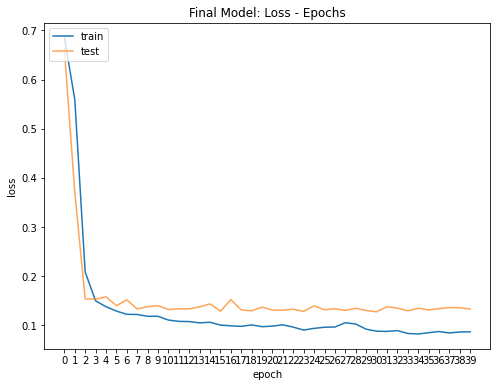

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_final.history.history['loss'], label = 'train')
plt.plot(model_final.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 10, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Loss - Epochs')

Text(0.5, 1.0, 'Final Model: Accuracy - Epochs')

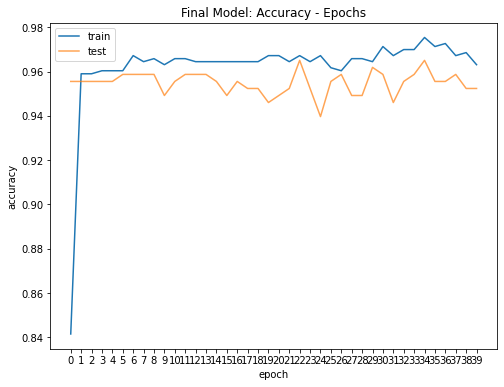

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_final.history.history['accuracy'], label = 'train')
plt.plot(model_final.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 10, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Accuracy - Epochs')

In [ ]:
y_pred = model_final.predict(x_test)

11/11 [==============================] - 0s 3ms/step


In [ ]:
y_pred.shape

(349, 1)

In [ ]:
y_pred_ = list(range(349))
#Print the Cross-validation Scores
for i in range(len(y_pred)):
       if y_pred[i] > 0.5 :
          y_pred_[i] = 1
       else :
            y_pred_[i] = 0
y_pred_[0]

1

In [ ]:
y_pred_[0]

1

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_) * 100

92.55014326647564

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_)
confusion_matrix

array([[154,  13],
       [ 13, 169]])

In [ ]:
confusion_matrix[1,1]

169

In [ ]:
def evaluation_criteria(confusion_matrix):
  accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0] + confusion_matrix[0,1] + confusion_matrix[1,0] + confusion_matrix[1,1])
  Accuracy = print("Accuracy = " , format(accuracy, '0.4f'))
  precision = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[1,0])
  Precision = print("Precision = " , format(precision, '0.4f'))
  sensivity = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[0,1])
  Sensivity = print("Sensivity = " , format(sensivity, '0.4f'))
  specificity = (confusion_matrix[1,1]) / (confusion_matrix[1,1] + confusion_matrix[1,0])
  Specificity = print("Specificity = " , format(specificity, '0.4f'))
  return(Accuracy,Precision,Sensivity,Specificity)

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9255
Precision =  0.9222
Sensivity =  0.9222
Specificity =  0.9286


(None, None, None, None)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn, x_test_scaled_onehot, y_test, cmap=plt.cm.Blues)
plt.rcParams["figure.figsize"] = [2,2]
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_)
print('roc_auc_score for Multilayer ANN: ', roc_auc_score(y_test, y_pred_))

roc_auc_score for Multilayer ANN:  0.9253635585970915


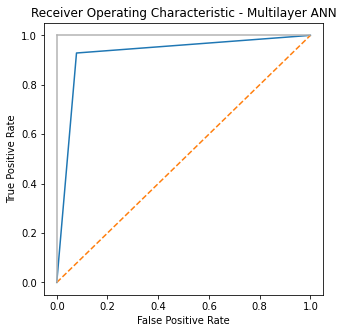

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Multilayer ANN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE-NC_Data

In [ ]:
df_smt.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
# Separation of independent variables and response variable
data = df_smt
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0


In [ ]:
# One Hot Encoding for Categorical features(independent variables)
data_x = pd.get_dummies(data = data_x, columns = ['Insurer',
        'with name?','state','coverage','previous period',
        'History of damage?',"Bachelor's calculation?"])
data_x.head()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage,Insurer_company,Insurer_person,...,coverage_annually,coverage_daily,coverage_long term,coverage_short term,previous period_no,previous period_yes,History of damage?_no,History of damage?_yes,Bachelor's calculation?_no,Bachelor's calculation?_yes
0,365,3040000000,20000000,40000000,5,250000,2337406,0.0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,365,4560000000,20000000,60000000,0,0,1728012,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
2,60,4560000000,10000000,30000000,5,250000,1152220,0.0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,365,4560000000,10000000,30000000,5,250000,2330516,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
4,365,4560000000,10000000,30000000,5,250000,6988686,20.0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
# One Hot Encoding for Categorical features(response variable)
data_y = pd.get_dummies(data = data_y, columns = ['churn'])
data_y

,no,yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1391,0,1
1392,0,1
1393,0,1
1394,0,1


In [ ]:
data_y = data_y.drop(["no"], axis = 1)
data_y

,yes
0,0
1,1
2,0
3,1
4,0
...,...
1391,1
1392,1
1393,1
1394,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_y = scaler.fit_transform(data_y)
data_y

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
#Check Frequency of each Category in Train Dataset
np.unique(data_y, return_counts = True)
#Balanced Data

(array([0., 1.]), array([698, 698]))

In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)
data_x

array([[0.9213198 , 0.05337079, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.9213198 , 0.10674157, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.14720812, 0.10674157, 0.06666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.9213198 , 0.15730337, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.9213198 , 0.05337079, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.50761421, 0.21185977, 0.11541121, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123)

In [ ]:
#Final Model
model_final = model_3l_func()

In [ ]:
#Train the Final Model
from tensorflow import random
random.set_seed(123)
model_final.fit(x_train, y_train, epochs = 40, batch_size = 32, validation_split = 0.3, verbose = 1)

Epoch 1/40
23/23 [==============================] - 1s 22ms/step - loss: 0.6891 - accuracy: 0.8292 - val_loss: 0.6760 - val_accuracy: 0.9587
Epoch 2/40
23/23 [==============================] - 0s 10ms/step - loss: 0.6090 - accuracy: 0.9590 - val_loss: 0.4665 - val_accuracy: 0.9587
Epoch 3/40
23/23 [==============================] - 0s 11ms/step - loss: 0.2718 - accuracy: 0.9590 - val_loss: 0.1497 - val_accuracy: 0.9587
Epoch 4/40
23/23 [==============================] - 0s 7ms/step - loss: 0.1503 - accuracy: 0.9563 - val_loss: 0.1354 - val_accuracy: 0.9587
Epoch 5/40
23/23 [==============================] - 0s 9ms/step - loss: 0.1383 - accuracy: 0.9631 - val_loss: 0.1486 - val_accuracy: 0.9587
Epoch 6/40
23/23 [==============================] - 0s 7ms/step - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.1200 - val_accuracy: 0.9619
Epoch 7/40
23/23 [==============================] - 0s 8ms/step - loss: 0.1177 - accuracy: 0.9672 - val_loss: 0.1231 - val_accuracy: 0.9587
Epoch 8/40
23/23 

Text(0.5, 1.0, 'Final Model: Loss - Epochs')

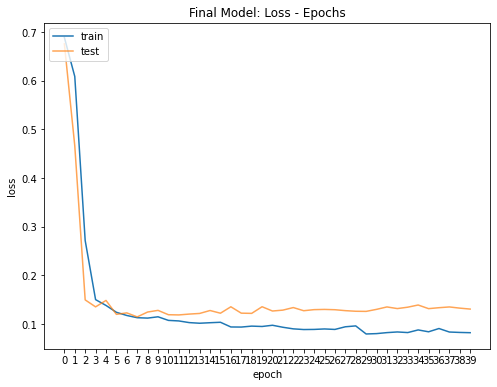

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_final.history.history['loss'], label = 'train')
plt.plot(model_final.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Loss - Epochs')

Text(0.5, 1.0, 'Final Model: Accuracy - Epochs')

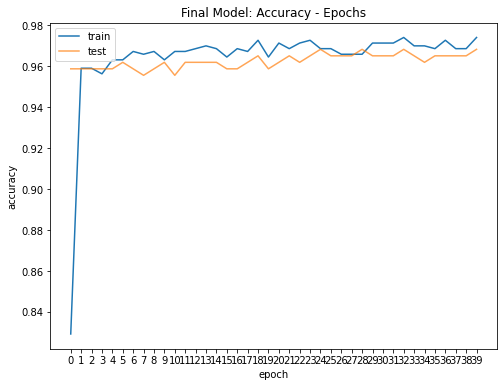

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(model_final.history.history['accuracy'], label = 'train')
plt.plot(model_final.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Accuracy - Epochs')

In [ ]:
y_pred = model_final.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
y_pred_ = list(range(349))
#Print the Cross-validation Scores
for i in range(len(y_pred)):
       if y_pred[i] > 0.5 :
          y_pred_[i] = 1
       else :
            y_pred_[i] = 0

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_) * 100

93.12320916905445

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_)
confusion_matrix

array([[155,  12],
       [ 12, 170]])

In [ ]:
def evaluation_criteria(confusion_matrix):
  accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0] + confusion_matrix[0,1] + confusion_matrix[1,0] + confusion_matrix[1,1])
  Accuracy = print("Accuracy = " , format(accuracy, '0.4f'))
  precision = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[1,0])
  Precision = print("Precision = " , format(precision, '0.4f'))
  sensivity = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[0,1])
  Sensivity = print("Sensivity = " , format(sensivity, '0.4f'))
  specificity = (confusion_matrix[1,1]) / (confusion_matrix[1,1] + confusion_matrix[1,0])
  Specificity = print("Specificity = " , format(specificity, '0.4f'))
  return(Accuracy,Precision,Sensivity,Specificity)

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9312
Precision =  0.9281
Sensivity =  0.9281
Specificity =  0.9341


(None, None, None, None)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_)
print('roc_auc_score for Multilayer ANN: ', roc_auc_score(y_test, y_pred_))

roc_auc_score for Multilayer ANN:  0.9311048233203921


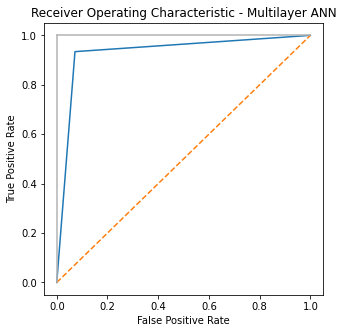

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Multilayer ANN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Machin Learning Algorithem

## Ensemble learning

## 1.Voting Classifier

### ROS_Data

In [ ]:
#Lets import the libraries and datasets
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

import statistics as stat

In [ ]:
df_ros.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
# Separation of independent variables and response variable
data = df_ros
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0


In [ ]:
# One Hot Encoding for Categorical features(independent variables)
data_x = pd.get_dummies(data = data_x, columns = ['Insurer',
        'with name?','state','coverage','previous period',
        'History of damage?',"Bachelor's calculation?"])
data_x.head()

,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,Total premium?,Risk percentage,Insurer_company,Insurer_person,...,coverage_annually,coverage_daily,coverage_long term,coverage_short term,previous period_no,previous period_yes,History of damage?_no,History of damage?_yes,Bachelor's calculation?_no,Bachelor's calculation?_yes
0,365,3040000000,20000000,40000000,5,250000,2337406,0.0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,365,4560000000,20000000,60000000,0,0,1728012,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
2,60,4560000000,10000000,30000000,5,250000,1152220,0.0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,365,4560000000,10000000,30000000,5,250000,2330516,0.0,0,1,...,1,0,0,0,0,1,1,0,1,0
4,365,4560000000,10000000,30000000,5,250000,6988686,20.0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:

df_ros.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 53)
(1047,)
(349, 53)
(349,)


In [ ]:
#We initialize the models
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC(kernel='rbf', probability=True)

In [ ]:
emodel = VotingClassifier(estimators=[('dt', model1), ('knn', model2),
                                    ('svc', model3)],
                        voting='soft')
emodel.fit(X_train, y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
#The accuracy score for the ensemble model is
escore=emodel.score(X_test, y_test)
print(escore)

0.9512893982808023


In [ ]:
y_pred = emodel.predict(X_test)
y_pred.shape

(349,)

In [ ]:
y_test.shape

(349,)

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[142,  14],
       [  3, 190]])

In [ ]:
def evaluation_criteria(confusion_matrix):
  accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / (confusion_matrix[0,0] + confusion_matrix[0,1] + confusion_matrix[1,0] + confusion_matrix[1,1])
  Accuracy = print("Accuracy = " , format(accuracy, '0.4f'))
  precision = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[1,0])
  Precision = print("Precision = " , format(precision, '0.4f'))
  sensivity = (confusion_matrix[0,0]) / (confusion_matrix[0,0] + confusion_matrix[0,1])
  Sensivity = print("Sensivity = " , format(sensivity, '0.4f'))
  specificity = (confusion_matrix[1,1]) / (confusion_matrix[1,1] + confusion_matrix[1,0])
  Specificity = print("Specificity = " , format(specificity, '0.4f'))
  return(Accuracy,Precision,Sensivity,Specificity)

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9513
Precision =  0.9793
Sensivity =  0.9103
Specificity =  0.9845


(None, None, None, None)

In [ ]:
y_test.head()

1020    yes
750      no
887      no
408     yes
744      no
Name: Churn, dtype: object

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test

,no,yes
1020,0,1
750,1,0
887,1,0
408,0,1
744,1,0
...,...,...
382,1,0
1328,0,1
154,0,1
916,0,1


In [ ]:
y_test = y_test.drop(["no"], axis = 1)
y_test

,yes
1020,1
750,0
887,0
408,1
744,0
...,...
382,0
1328,1
154,1
916,1


In [ ]:
y_pred[0]

'yes'

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred

,no,yes
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
344,1,0
345,0,1
346,0,1
347,0,1


In [ ]:
y_pred = y_pred.drop(["no"], axis = 1)
y_pred

,yes
0,1
1,0
2,0
3,1
4,0
...,...
344,0
345,1
346,1
347,1


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for VotingClassifier : ', roc_auc_score(y_test, y_pred))

roc_auc_score for VotingClassifier :  0.9473561844028165


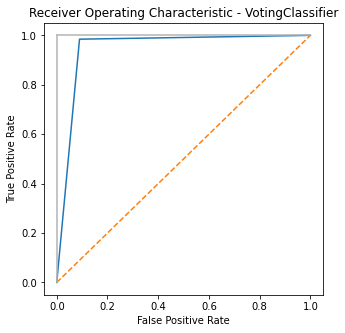

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - VotingClassifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE-NC_Data

In [ ]:
df_smt.head()

NameError: ignored

In [ ]:
# Separation of independent variables and response variable
data = df_smt
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

In [ ]:
# One Hot Encoding for Categorical features(independent variables)
data_x = pd.get_dummies(data = data_x, columns = ['Insurer',
        'with name?','state','coverage','previous period',
        'History of damage?',"Bachelor's calculation?"])
data_x.head()

NameError: ignored

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 53)
(1047,)
(349, 53)
(349,)


In [ ]:
#We initialize the models
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC(kernel='rbf', probability=True)

In [ ]:
emodel = VotingClassifier(estimators=[('dt', model1), ('knn', model2),
                                    ('svc', model3)],
                        voting='soft')
emodel.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
#The accuracy score for the ensemble model is
escore=emodel.score(X_test, y_test)
print(escore)

0.9455587392550143


In [ ]:
y_pred = emodel.predict(X_test)
y_pred.shape

(349,)

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[146,  10],
       [  9, 184]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9456
Precision =  0.9419
Sensivity =  0.9359
Specificity =  0.9534


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
y_test

,yes
1020,1
750,0
887,0
408,1
744,0
...,...
382,0
1328,1
154,1
916,1


In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)
y_pred

,yes
0,1
1,0
2,0
3,1
4,0
...,...
344,0
345,1
346,0
347,1


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for VotingClassifier : ', roc_auc_score(y_test, y_pred))

roc_auc_score for VotingClassifier :  0.9446326557725521


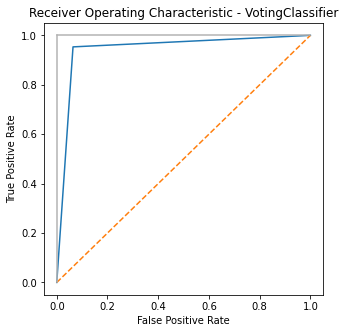

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - VotingClassifier')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2.Bagging

### ROS_Data

#### bagging use SVM

In [ ]:
# Importing libraries
from random import seed
from random import randrange
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics as stat
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df_ros.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
# Separation of independent variables and response variable
data = df_ros
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(svm.SVC(kernel='rbf', probability=True),n_estimators=10,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5702005730659025

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

'no'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 91,  65],
       [ 85, 108]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.5702
Precision =  0.5170
Sensivity =  0.5833
Specificity =  0.5596


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
y_test

,yes
1020,1
750,0
887,0
408,1
744,0
...,...
382,0
1328,1
154,1
916,1


In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)
y_pred

,yes
0,0
1,1
2,0
3,0
4,1
...,...
344,0
345,1
346,0
347,1


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-SVM : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-SVM :  0.5714594127806563


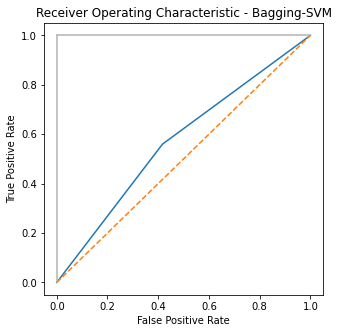

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-SVM')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### bagging use RandomForest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
# Separation of independent variables and response variable
data = df_ros
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
rfc = RandomForestClassifier( n_estimators=100, random_state=1, n_jobs=-1, oob_score=True)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc')
print("Auc: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

rfc.fit(X_train, y_train)
print('Overall AUC:', roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

Auc: 0.99 (+/- 0.00)
Overall AUC: 0.9705726052876312


In [ ]:
rfc = RandomForestClassifier( n_estimators=1000, random_state=1, n_jobs=-1, oob_score=True)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc')
print("Auc: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

rfc.fit(X_train, y_train)
print('Overall AUC:', roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

Auc: 0.99 (+/- 0.00)
Overall AUC: 0.975554669855188


In [ ]:
y_pred = rfc.predict(X_test)
y_pred[0]

'yes'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[145,  11],
       [  0, 193]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9685
Precision =  1.0000
Sensivity =  0.9295
Specificity =  1.0000


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-RandomForest : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-RandomForest :  0.9647435897435898


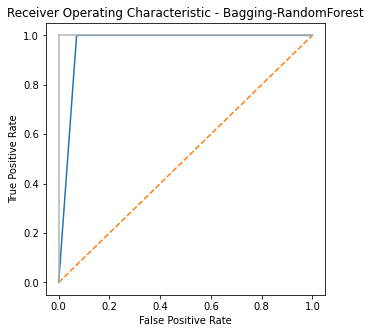

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-RandomForest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(rfc.feature_importances_)

[0.01078491 0.00596412 0.05639655 0.01096167 0.02571615 0.03949248
 0.02834104 0.03223173 0.01388998 0.01542332 0.68317068 0.00256461
 0.00361737 0.06444735 0.00699804]


In [ ]:
import numpy as np

importances = rfc.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) History of damage?             0.669275
 2) coverage                       0.060328
 3) Risk percentage                0.056081
 4) Medical fee per incident       0.032883
 5) Franchise percentage           0.029293
 6) Compensation                   0.027387
 7) Medical fee in period          0.026949
 8) duration                       0.025640
 9) Minimum franchise              0.021678
10) previous period                0.018941
11) with name?                     0.012707
12) churn                          0.009262
13) state                          0.005496
14) Total premium?                 0.002947
15) Bachelor's calculation?        0.001130


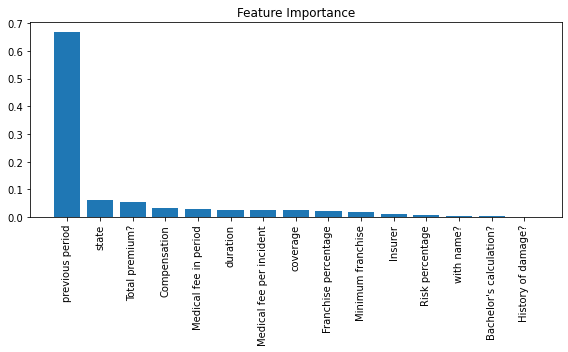

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

#### bagging use DecisionTree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Separation of independent variables and response variable
data = df_ros
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(dt, X_train, y_train)
print(scores.mean())

0.942697653223969


In [ ]:
eclf = BaggingClassifier(base_estimator= dt)

In [ ]:
scores = cross_val_score(eclf,X_train, y_train)
print(scores.mean())

0.9493916609706083


In [ ]:
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
y_pred[0]

'yes'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[145,  11],
       [  4, 189]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9570
Precision =  0.9732
Sensivity =  0.9295
Specificity =  0.9793


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-DecisionTree : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-DecisionTree :  0.9543808954430716


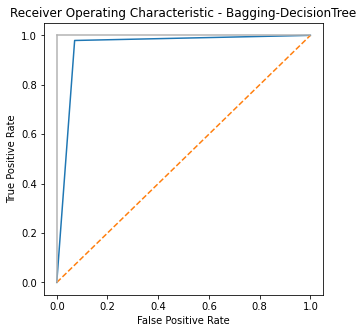

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE-NC_Data

#### bagging use SVM

In [ ]:
# Importing libraries
from random import seed
from random import randrange
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics as stat
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df_smt.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
# Separation of independent variables and response variable
data = df_smt
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(svm.SVC(kernel='rbf', probability=True),n_estimators=10,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5959885386819485

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

'no'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 92,  64],
       [ 77, 116]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.5960
Precision =  0.5444
Sensivity =  0.5897
Specificity =  0.6010


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(predict variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-SVM : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-SVM :  0.5953899295868208


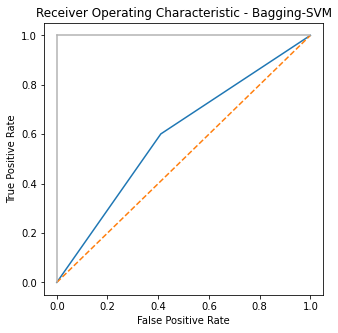

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-SVM')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### bagging use RandomForest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
# Separation of independent variables and response variable
data = df_smt
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
rfc = RandomForestClassifier( n_estimators=10, random_state=1, n_jobs=-1, oob_score=True)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc')
print("Auc: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

rfc.fit(X_train, y_train)
print('Overall AUC:', roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Auc: 0.98 (+/- 0.01)
Overall AUC: 0.9674172977281786


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
rfc = RandomForestClassifier( n_estimators=10000, random_state=1, n_jobs=-1, oob_score=True)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc')
print("Auc: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

rfc.fit(X_train, y_train)
print('Overall AUC:', roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

Auc: 0.99 (+/- 0.00)
Overall AUC: 0.9744752225322174


In [ ]:
y_pred = rfc.predict(X_test)
y_pred[0]

'yes'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[145,  11],
       [  5, 188]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9542
Precision =  0.9667
Sensivity =  0.9295
Specificity =  0.9741


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-RandomForest : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-RandomForest :  0.951790221867942


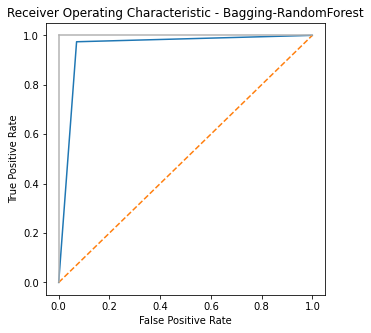

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-RandomForest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(rfc.feature_importances_)

[0.01270732 0.00549645 0.06032822 0.02564017 0.02738725 0.03288277
 0.02694949 0.02929255 0.02167819 0.01894121 0.66927532 0.00113026
 0.00294749 0.0560813  0.00926202]


#### bagging use DecisionTree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Separation of independent variables and response variable
data = df_smt
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0        no
1       yes
2        no
3       yes
4        no
       ... 
1391    yes
1392    yes
1393    yes
1394    yes
1395    yes
Name: Churn, Length: 1396, dtype: object

In [ ]:
columnsToEncode = list(data_x.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data_x[feature] = le.fit_transform(data_x[feature])
    except:
        print('Error encoding ' + feature)
data_x.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1047, 15)
(1047,)
(349, 15)
(349,)


In [ ]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(dt, X_train, y_train)
print(scores.mean())

0.941740715424926


In [ ]:
eclf = BaggingClassifier(base_estimator= dt)

In [ ]:
scores = cross_val_score(eclf,X_train, y_train)
print(scores.mean())

0.9532102984734564


In [ ]:
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
y_pred[0]

'yes'

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[146,  10],
       [  8, 185]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9484
Precision =  0.9481
Sensivity =  0.9359
Specificity =  0.9585


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Bagging-DecisionTree : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Bagging-DecisionTree :  0.9472233293476816


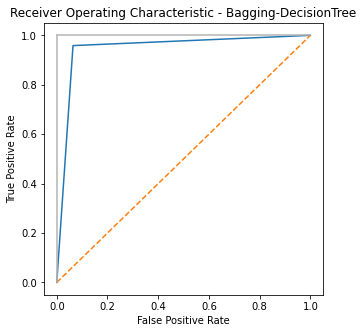

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Bagging-DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.Boosting

### ROS_Data

#### AdaBoost

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Separation of independent variables and response variable
data = df_ros

In [ ]:
columnsToEncode = list(data.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding ' + feature)
data.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,1,0,9,0,365,3040000000,20000000,40000000,5,250000,0,0,0,2337406,0.0,0
1,1,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0,1
2,1,0,10,1,60,4560000000,10000000,30000000,5,250000,0,0,0,1152220,0.0,0
3,1,0,26,0,365,4560000000,10000000,30000000,5,250000,1,0,0,2330516,0.0,1
4,1,1,23,0,365,4560000000,10000000,30000000,5,250000,0,0,0,6988686,20.0,0


In [ ]:
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0       0
1       1
2       0
3       1
4       0
       ..
1391    1
1392    1
1393    1
1394    1
1395    1
Name: Churn, Length: 1396, dtype: int64

In [ ]:
data_x.shape

(1396, 15)

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
X_train.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage
1142,0,1,19,0,365,1520000000,10000000,10000000,5,250000,1,0,0,2100814,0.0
188,1,0,11,0,365,3040000000,40000000,80000000,5,250000,0,0,0,1823624,0.0
189,0,0,5,0,365,1520000000,20000000,20000000,5,250000,0,0,0,2231300,0.0
855,0,0,14,1,62,6000000000,40000000,80000000,5,250000,0,0,0,12444408,0.0
895,1,0,20,1,184,6000000000,50000000,150000000,5,250000,1,0,0,4478868,0.0


In [ ]:
X_train = X_train.values
X_train

array([[0.000000e+00, 1.000000e+00, 1.900000e+01, ..., 0.000000e+00,
        2.100814e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.100000e+01, ..., 0.000000e+00,
        1.823624e+06, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 5.000000e+00, ..., 0.000000e+00,
        2.231300e+06, 0.000000e+00],
       ...,
       [1.000000e+00, 0.000000e+00, 2.300000e+01, ..., 0.000000e+00,
        2.914788e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 2.300000e+01, ..., 0.000000e+00,
        3.525454e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.100000e+01, ..., 0.000000e+00,
        1.080000e+06, 0.000000e+00]])

In [ ]:
X_train

array([[0.000000e+00, 1.000000e+00, 1.900000e+01, ..., 0.000000e+00,
        2.100814e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.100000e+01, ..., 0.000000e+00,
        1.823624e+06, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 5.000000e+00, ..., 0.000000e+00,
        2.231300e+06, 0.000000e+00],
       ...,
       [1.000000e+00, 0.000000e+00, 2.300000e+01, ..., 0.000000e+00,
        2.914788e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 2.300000e+01, ..., 0.000000e+00,
        3.525454e+06, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.100000e+01, ..., 0.000000e+00,
        1.080000e+06, 0.000000e+00]])

In [ ]:
y_train = y_train.values

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

0.942697653223969

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME")
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

0.940788334472545

In [ ]:
X_test = X_test.values

In [ ]:
y_pred = clf.predict(X_test)


array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[146,  10],
       [  9, 184]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9456
Precision =  0.9419
Sensivity =  0.9359
Specificity =  0.9534


(None, None, None, None)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Boosting-AdaBoost :  0.9446326557725521


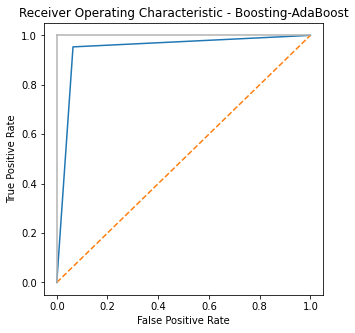

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### XGBoost

In [ ]:
data = df_ros
data.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insurer                   1396 non-null   object 
 1   with name?                1396 non-null   object 
 2   state                     1396 non-null   object 
 3   coverage                  1396 non-null   object 
 4   duration                  1396 non-null   int64  
 5   Compensation              1396 non-null   int64  
 6   Medical fee per incident  1396 non-null   int64  
 7   Medical fee in period     1396 non-null   int64  
 8   Franchise percentage      1396 non-null   int64  
 9   Minimum franchise         1396 non-null   int64  
 10  previous period           1396 non-null   object 
 11  History of damage?        1396 non-null   object 
 12  Bachelor's calculation?   1396 non-null   object 
 13  Total premium?            1396 non-null   int64  
 14  Risk per

In [ ]:
cols = ["Insurer","with name?","state","coverage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Insurer                   1396 non-null   int8   
 1   with name?                1396 non-null   int8   
 2   state                     1396 non-null   int8   
 3   coverage                  1396 non-null   int8   
 4   duration                  1396 non-null   int64  
 5   Compensation              1396 non-null   int64  
 6   Medical fee per incident  1396 non-null   int64  
 7   Medical fee in period     1396 non-null   int64  
 8   Franchise percentage      1396 non-null   int64  
 9   Minimum franchise         1396 non-null   int8   
 10  previous period           1396 non-null   int8   
 11  History of damage?        1396 non-null   int8   
 12  Bachelor's calculation?   1396 non-null   int8   
 13  Total premium?            1396 non-null   int64  
 14  Risk per

In [ ]:

train, test, y_train, y_test = train_test_split(data.drop(["Churn"], axis=1), data["Churn"],
                                                random_state=10, test_size=0.25)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import metrics

def auc(m, train, test):
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3,
                                   verbose=10, n_jobs=-1)
grid_search.fit(train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(train,y_train)

auc(model, train, test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


(1.0, 0.9545065507933372)

In [ ]:
y_pred = model.predict(test)

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[150,  16],
       [  2, 181]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9484
Precision =  0.9868
Sensivity =  0.9036
Specificity =  0.9891


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Boosting-AdaBoost :  0.9463427480413457


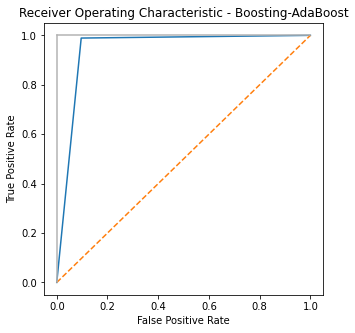

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Light GBM

In [ ]:
data = df_ros
data.head()

,Insurer,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,person,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,person,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,person,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,person,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,person,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
cols = ["Insurer","with name?","state","coverage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1

In [ ]:

train, test, y_train, y_test = train_test_split(data.drop(["Churn"], axis=1), data["Churn"],
                                                random_state=10, test_size=0.25)

In [ ]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test):
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(train, label=y_train,free_raw_data=False)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

#With Catgeorical Features
cate_features_name = ["Insurer","with name?","state","coverage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?"]
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, train, test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1208: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ["Bachelor's calculation?", 'History of damage?', 'Insurer', 'Minimum franchise', 'coverage', 'previous period', 'state', 'with name?']
  warnings.warn('categorical_feature in Dataset is overridden.\n'


(1.0, 0.052570939495687675)

In [ ]:
y_pred = model2.predict(test)

In [ ]:
y_pred

array([0.93323161, 1.96787386, 0.8908906 , 0.98932938, 0.98199689,
       1.99811743, 2.02976064, 2.01473422, 0.87628569, 1.05754628,
       0.99233368, 2.03316291, 0.9760442 , 1.07649018, 0.96628393,
       1.92492164, 1.05318763, 1.92722139, 0.99832147, 0.93623454,
       2.00680481, 0.99111745, 1.03564867, 0.99624784, 1.724866  ,
       2.00151779, 1.07779134, 2.021538  , 1.71330736, 0.98913788,
       1.63903086, 0.97902551, 1.1535098 , 2.03753552, 0.984837  ,
       1.00279189, 1.75521031, 1.84879635, 2.00017332, 1.96947432,
       1.99860556, 1.05323743, 1.0041272 , 0.97048156, 2.00881405,
       1.9467049 , 1.01902181, 0.98941384, 1.99585602, 0.99352466,
       1.97149354, 2.04119851, 0.98910927, 2.00775822, 0.99765651,
       1.99130208, 1.99061052, 1.98840062, 1.90187959, 0.99841092,
       1.94497765, 2.01753752, 0.97773559, 0.99417753, 1.81432443,
       0.99040084, 0.99311978, 1.09205972, 0.98864102, 0.93918732,
       0.9600766 , 1.0230836 , 2.00536131, 1.06548221, 2.01051

In [ ]:
y_pred = model2.predict(test)
y_pred_ = list(range(349))
#Print the Cross-validation Scores
for i in range(len(y_pred)):
       if y_pred[i] > 1.5 :
          y_pred_[i] = 1
       else :
            y_pred_[i] = 0

In [ ]:
y_pred_

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


In [ ]:
y_test

7       1
1048    0
326     1
564     1
689     1
       ..
1096    0
341     1
529     1
1208    0
1257    0
Name: 1, Length: 349, dtype: uint8

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_)
confusion_matrix

array([[  3, 180],
       [150,  16]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.0544
Precision =  0.0196
Sensivity =  0.0164
Specificity =  0.0964


(None, None, None, None)

In [ ]:
y_test

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test)
y_test = y_test[1]
# One Hot Encoding for Categorical features(response variable)
y_pred_ = pd.get_dummies(data = y_pred_)
y_pred_ = y_pred_[1]

NameError: ignored

In [ ]:
y_pred_

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred_))

NameError: ignored

In [ ]:
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE-NC_Data

#### AdaBoost

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Separation of independent variables and response variable
data = df_smt

In [ ]:
columnsToEncode = list(data.select_dtypes(include=['category','object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        data[feature] = le.fit_transform(data[feature])
    except:
        print('Error encoding ' + feature)
data.head()

,gender,Insurer,risk,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,1,1,2,0,9,0,365,3040000000,20000000,40000000,1,250000,0,0,0,2337406,0.0,0
1,1,1,0,0,9,0,365,4560000000,20000000,60000000,0,0,1,0,0,1728012,0.0,1
2,1,1,2,0,10,1,60,4560000000,10000000,30000000,1,250000,0,0,0,1152220,0.0,0
3,1,1,0,0,26,0,365,4560000000,10000000,30000000,1,250000,1,0,0,2330516,0.0,1
4,1,1,2,1,23,0,365,4560000000,10000000,30000000,1,250000,0,0,0,6988686,20.0,0


In [ ]:
data_x = data.drop(["Churn"], axis=1)
data_y = data.iloc[:,-1]
data_y

0       0
1       1
2       0
3       1
4       0
       ..
1391    1
1392    1
1393    1
1394    1
1395    1
Name: Churn, Length: 1396, dtype: int64

In [ ]:
data_x.shape

(1396, 17)

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

0.9417589428115744

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME")
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

0.9369742538163592

In [ ]:
X_test = X_test.values

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[146,  10],
       [  3, 190]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9628
Precision =  0.9799
Sensivity =  0.9359
Specificity =  0.9845


(None, None, None, None)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Boosting-AdaBoost :  0.9601766972233293


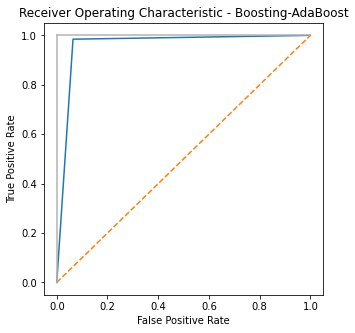

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### XGBoost

In [ ]:
data = df_smt
data.head()

,gender,Insurer,risk,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,male,person,risky,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,male,person,low risk,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,male,person,risky,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,male,person,low risk,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,male,person,risky,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    1396 non-null   object 
 1   Insurer                   1396 non-null   object 
 2   risk                      1396 non-null   object 
 3   with name?                1396 non-null   object 
 4   state                     1396 non-null   object 
 5   coverage                  1396 non-null   object 
 6   duration                  1396 non-null   int64  
 7   Compensation              1396 non-null   int64  
 8   Medical fee per incident  1396 non-null   int64  
 9   Medical fee in period     1396 non-null   int64  
 10  Franchise percentage      1396 non-null   object 
 11  Minimum franchise         1396 non-null   int64  
 12  previous period           1396 non-null   object 
 13  History of damage?        1396 non-null   object 
 14  Bachelor

In [ ]:
cols = ["gender","Insurer","risk","with name?","state","coverage","Franchise percentage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1

In [ ]:
train, test, y_train, y_test = train_test_split(data.drop(["Churn"], axis=1), data["Churn"],
                                                random_state=10, test_size=0.25)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import metrics

def auc(m, train, test):
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3,
                                   verbose=10, n_jobs=-1)
grid_search.fit(train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(train,y_train)

auc(model, train, test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


(1.0, 0.9557903746132069)

In [ ]:
y_pred = model.predict(test)

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[150,  16],
       [  8, 175]])

In [ ]:
evaluation_criteria(confusion_matrix)

Accuracy =  0.9312
Precision =  0.9494
Sensivity =  0.9036
Specificity =  0.9563


(None, None, None, None)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test, columns = ['churn'])
y_test = y_test.drop(["no"], axis = 1)
# One Hot Encoding for Categorical features(response variable)
y_pred = pd.get_dummies(data = y_pred, columns = ['churn'])
y_pred = y_pred.drop(["no"], axis = 1)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred))

roc_auc_score for Boosting-AdaBoost :  0.9299493054183949


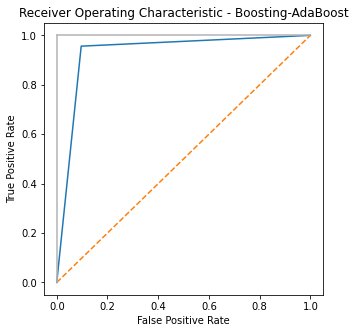

In [ ]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Light GBM

In [ ]:
data = df_smt
data.head()

,gender,Insurer,risk,with name?,state,coverage,duration,Compensation,Medical fee per incident,Medical fee in period,Franchise percentage,Minimum franchise,previous period,History of damage?,Bachelor's calculation?,Total premium?,Risk percentage,Churn
0,male,person,risky,no,Hormozgan,annually,365,3040000000,20000000,40000000,5,250000,no,no,no,2337406,0.0,no
1,male,person,low risk,no,Hormozgan,annually,365,4560000000,20000000,60000000,0,0,yes,no,no,1728012,0.0,yes
2,male,person,risky,no,Ilam,daily,60,4560000000,10000000,30000000,5,250000,no,no,no,1152220,0.0,no
3,male,person,low risk,no,South Khorasan,annually,365,4560000000,10000000,30000000,5,250000,yes,no,no,2330516,0.0,yes
4,male,person,risky,yes,Razavi Khorasan,annually,365,4560000000,10000000,30000000,5,250000,no,no,no,6988686,20.0,no


In [ ]:
cols = ["gender","Insurer","risk","with name?","state","coverage","Franchise percentage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?","Churn"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1

In [ ]:
train, test, y_train, y_test = train_test_split(data.drop(["Churn"], axis=1), data["Churn"],
                                                random_state=10, test_size=0.25)

In [ ]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test):
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(train, label=y_train,free_raw_data=False)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

#With Catgeorical Features
cate_features_name = ["gender","Insurer","risk","with name?","state","coverage","Franchise percentage",
        "Minimum franchise","previous period","History of damage?","Bachelor's calculation?"]
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, train, test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
y_pred = model2.predict(test)
y_pred_ = list(range(349))
#Print the Cross-validation Scores
for i in range(len(y_pred)):
       if y_pred[i] > 1.5 :
          y_pred_[i] = 2
       else :
            y_pred_[i] = 1

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_)
confusion_matrix

In [ ]:
evaluation_criteria(confusion_matrix)

In [ ]:
# One Hot Encoding for Categorical features(response variable)
y_test = pd.get_dummies(data = y_test)
y_test = y_test[1]
# One Hot Encoding for Categorical features(response variable)
y_pred_ = pd.get_dummies(data = y_pred_)
y_pred_ = y_pred_[1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_)
print('roc_auc_score for Boosting-AdaBoost : ', roc_auc_score(y_test, y_pred_))

In [ ]:
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Boosting-AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()